In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Conv2D, Conv2DTranspose, BatchNormalization, UpSampling1D, UpSampling2D, Dense, MaxPool2D, LeakyReLU, Reshape, Dropout, Flatten, GaussianNoise, Embedding, multiply, concatenate, add
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import time
import pickle
from sklearn.model_selection import train_test_split

In [3]:
tf.__version__

'2.1.0'

In [219]:
def normalize_img(img):
    return (img - 127.5)/127.5

def unnormalize_img(img):
    return (img + 1.) / 2.

In [220]:
def load_image_caption_dict():
    caption_dict = None
    with open('./bert/embeddedcaptions.pickle', 'rb') as f:
        return pickle.load(f)
    
caption_dict = load_image_caption_dict()

In [221]:
train_imgs = []
train_classes = []
train_captions = []
class_index = 0
import os
for root, dirs, files in os.walk("./CUB_200_2011/CUB_200_2011/images-cleaned-named/", topdown=False):
    print(f'{len(files)} samples in class {class_index}, ({root})')
    for name in files:
        train_imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, name)), cv2.COLOR_RGB2BGR))
        train_classes.append(class_index)
        train_captions.append(caption_dict[name.split('.')[0]+'.txt'][0]) # Just using the first of 10 captions for now
    class_index += 1
train_imgs = np.array(train_imgs)
train_imgs = (train_imgs - 127.5)/127.5
train_imgs = train_imgs.astype(np.float32)
train_classes = np.array(train_classes)
train_captions = np.array(train_captions)

60 samples in class 0, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/001.Black_footed_Albatross)
60 samples in class 1, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/002.Laysan_Albatross)
58 samples in class 2, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/003.Sooty_Albatross)
60 samples in class 3, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/004.Groove_billed_Ani)
44 samples in class 4, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/005.Crested_Auklet)
41 samples in class 5, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/006.Least_Auklet)
53 samples in class 6, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/007.Parakeet_Auklet)
48 samples in class 7, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/008.Rhinoceros_Auklet)
59 samples in class 8, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/009.Brewer_Blackbird)
60 samples in class 9, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/010.Red_winged_Blackbird)
60 samples in class 10, (./CUB_200_2011/CUB_20

60 samples in class 91, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/092.Nighthawk)
60 samples in class 92, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/093.Clark_Nutcracker)
60 samples in class 93, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/094.White_breasted_Nuthatch)
60 samples in class 94, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/095.Baltimore_Oriole)
60 samples in class 95, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/096.Hooded_Oriole)
59 samples in class 96, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/097.Orchard_Oriole)
60 samples in class 97, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/098.Scott_Oriole)
60 samples in class 98, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/099.Ovenbird)
60 samples in class 99, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/100.Brown_Pelican)
50 samples in class 100, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/101.White_Pelican)
60 samples in class 101, (./CUB_200_2011/CUB_200_2011/images-c

60 samples in class 187, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/188.Pileated_Woodpecker)
60 samples in class 188, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/189.Red_bellied_Woodpecker)
58 samples in class 189, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/190.Red_cockaded_Woodpecker)
60 samples in class 190, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/191.Red_headed_Woodpecker)
60 samples in class 191, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/192.Downy_Woodpecker)
60 samples in class 192, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/193.Bewick_Wren)
60 samples in class 193, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/194.Cactus_Wren)
60 samples in class 194, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/195.Carolina_Wren)
59 samples in class 195, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/196.House_Wren)
60 samples in class 196, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/197.Marsh_Wren)
60 samples in class 197, (./CUB_20

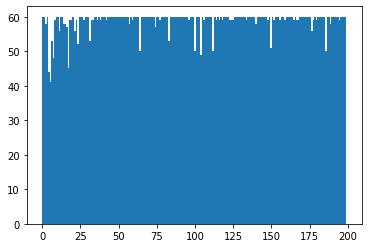

(11788, 64, 64, 3)


In [222]:
plt.hist(train_classes, bins=200)
plt.show()
assert(len(train_imgs) == len(train_classes))
print(train_imgs.shape)

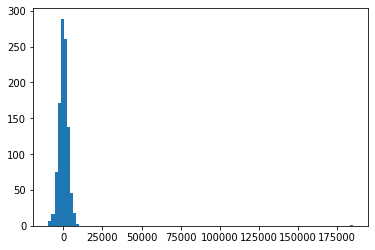

929
18.448483


In [223]:
plt.hist(np.sum(train_captions, axis=0), bins=100)
plt.show()
print(np.argmax(np.sum(train_captions, axis=0)))
print(train_captions[2786][929])

In [224]:
def create_simple_attrs(attrs):
    # Structure is like so: [0-14:color, 15-19:size, 20-33:shape]

    simple_attrs = np.zeros((attrs.shape[0], 34))
    
    # Color
    simple_attrs[:, 0:15] = attrs[:, 248:263]
    
    # Size and shape
    simple_attrs[:, 15:34] = attrs[:, 217:236]
    
    return simple_attrs


In [225]:
def create_even_simpler_attrs(attrs):
    # Structure is like so: [0-4:color, 5-7:size, 8-9:shape]
    
    simplest_attrs = np.zeros((attrs.shape[0], 10))
    
    simplest_attrs[:, 0] = attrs[:, 1] # Brown
    simplest_attrs[:, 1] = attrs[:, 5] # Grey
    simplest_attrs[:, 2] = attrs[:, 11] # Black
    simplest_attrs[:, 3] = attrs[:, 12] # White
    simplest_attrs[:, 4] = np.clip(np.sum(attrs[:, [0, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14]], axis=1), a_min=0, a_max=1) # Other
    
    simplest_attrs[:, 5] = attrs[:, 19] # Smallest
    simplest_attrs[:, 6] = attrs[:, 16] # Small
    simplest_attrs[:, 7] = np.clip(np.sum(attrs[:, [15, 17, 18]], axis=1), a_min=0, a_max=1) # Large
    
    simplest_attrs[:, 8] = attrs[:, 33] # Perching-like
    simplest_attrs[:, 9] = np.clip(np.sum(attrs[:, [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]], axis=1), a_min=0, a_max=1) # Not perching-like
    
    return simplest_attrs

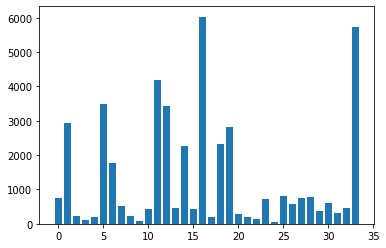

In [226]:
def load_image_attributes():
    train_attrs = np.zeros((train_imgs.shape[0], 312))
    with open('./CUB_200_2011/CUB_200_2011/attributes/image_attribute_labels.txt', 'r') as f:
        lines = f.readlines()
        for line in lines:
            
            # For now we don't care about attribute certainty, just if it is present.
            try:
                split = line.split()
                img_id = int(split[0])
                assert(img_id > 0)
                assert(img_id <= 11788)
                attr_id = int(split[1])
                assert(attr_id > 0)
                assert(attr_id <= 312)
                is_present = int(split[2])
                assert(is_present == 0 or is_present == 1)
            except: 
                print(line)
                print(line.split())
                return
            
            train_attrs[img_id-1, attr_id-1] = is_present
    return train_attrs

train_attrs = load_image_attributes().astype('float32')
train_attrs = create_simple_attrs(train_attrs)
plt.bar([x for x in range(34)], np.sum(train_attrs, axis=0))
plt.show()
train_attrs = create_even_simpler_attrs(train_attrs)
train_attrs = train_attrs.astype(np.float32)

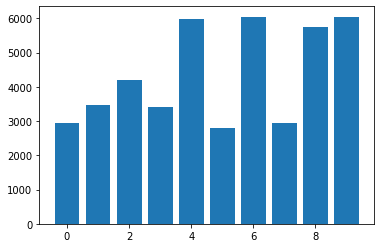

4358.4
1349.5349


In [227]:
plt.bar([x for x in range(10)], np.sum(train_attrs, axis=0))
plt.show()
sum_attrs = np.sum(train_attrs, axis=0)

print(np.mean(sum_attrs))
print(np.std(sum_attrs))
# np.argmin(sum_attrs)

In [180]:
def make_caption_autoencoder(attribute_shape):
    caption_shape = 1024
    captions_in = Input(shape=(caption_shape))
    
    x = Reshape((caption_shape, 1))(captions_in)
    
    x = Conv1D(16, 3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Conv1D(32, 3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Conv1D(64, 3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Flatten()(x)
    
#     x = Dropout(0.5)(x)
    
    x = Dense(attribute_shape, name='attr_out', activation='sigmoid')(x)
    attr_out = x
    
    x = Dense(8192)(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Reshape((128, 64))(x)

    x = UpSampling1D()(x)
    x = Conv1D(64, 3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = UpSampling1D()(x)
    x = Conv1D(32, 3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = UpSampling1D()(x)
    x = Conv1D(16, 3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    
    x = Conv1D(1, 3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Flatten(name='caption_out')(x)
    
#     x = Dense(1024, name='caption_out')(x)
    
    return Model(captions_in, [x, attr_out])

In [181]:
autoencoder = make_caption_autoencoder(10)
autoencoder.summary()

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        [(None, 1024)]            0         
_________________________________________________________________
reshape_38 (Reshape)         (None, 1024, 1)           0         
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 512, 16)           64        
_________________________________________________________________
leaky_re_lu_183 (LeakyReLU)  (None, 512, 16)           0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 512, 16)           0         
_________________________________________________________________
conv1d_112 (Conv1D)          (None, 256, 32)           1568      
_________________________________________________________________
leaky_re_lu_184 (LeakyReLU)  (None, 256, 32)           0  

In [182]:
losses = {
    'caption_out': 'mse',
    'attr_out': 'binary_crossentropy',
}

lossWeights = {'caption_out': 1.0, 'attr_out': 1.0}

autoencoder.compile(optimizer = Adam(0.0001),
                    loss = losses,
                    loss_weights = lossWeights)

c_train, c_test, a_train, a_test = train_test_split(train_captions, train_attrs, test_size=0.2)

history = autoencoder.fit(c_train,
                {'caption_out' : c_train, 'attr_out' : a_train},
                validation_data=(c_test, [c_test, a_test]),
                epochs=200,
                batch_size=256)

Train on 9430 samples, validate on 2358 samples
Epoch 1/200
9430/9430 [==============================] - 4s 449us/sample - loss: 0.9723 - caption_out_loss: 0.3132 - attr_out_loss: 0.6591 - val_loss: 0.9506 - val_caption_out_loss: 0.3091 - val_attr_out_loss: 0.6414
Epoch 2/200
9430/9430 [==============================] - 1s 144us/sample - loss: 0.9366 - caption_out_loss: 0.3025 - attr_out_loss: 0.6340 - val_loss: 0.9233 - val_caption_out_loss: 0.2900 - val_attr_out_loss: 0.6335
Epoch 3/200
9430/9430 [==============================] - 1s 144us/sample - loss: 0.9155 - caption_out_loss: 0.2823 - attr_out_loss: 0.6332 - val_loss: 0.8941 - val_caption_out_loss: 0.2604 - val_attr_out_loss: 0.6339
Epoch 4/200
9430/9430 [==============================] - 1s 144us/sample - loss: 0.8910 - caption_out_loss: 0.2588 - attr_out_loss: 0.6322 - val_loss: 0.8641 - val_caption_out_loss: 0.2310 - val_attr_out_loss: 0.6334
Epoch 5/200
9430/9430 [==============================] - 1s 144us/sample - loss: 0.8

9430/9430 [==============================] - 1s 144us/sample - loss: 0.6879 - caption_out_loss: 0.0839 - attr_out_loss: 0.6040 - val_loss: 0.6517 - val_caption_out_loss: 0.0512 - val_attr_out_loss: 0.6017
Epoch 39/200
9430/9430 [==============================] - 1s 145us/sample - loss: 0.6872 - caption_out_loss: 0.0836 - attr_out_loss: 0.6036 - val_loss: 0.6516 - val_caption_out_loss: 0.0509 - val_attr_out_loss: 0.6018
Epoch 40/200
9430/9430 [==============================] - 1s 145us/sample - loss: 0.6867 - caption_out_loss: 0.0837 - attr_out_loss: 0.6030 - val_loss: 0.6504 - val_caption_out_loss: 0.0509 - val_attr_out_loss: 0.6006
Epoch 41/200
9430/9430 [==============================] - 1s 145us/sample - loss: 0.6843 - caption_out_loss: 0.0828 - attr_out_loss: 0.6015 - val_loss: 0.6491 - val_caption_out_loss: 0.0505 - val_attr_out_loss: 0.6000
Epoch 42/200
9430/9430 [==============================] - 1s 145us/sample - loss: 0.6848 - caption_out_loss: 0.0824 - attr_out_loss: 0.6023 -

Epoch 76/200
9430/9430 [==============================] - 1s 145us/sample - loss: 0.6655 - caption_out_loss: 0.0728 - attr_out_loss: 0.5927 - val_loss: 0.6316 - val_caption_out_loss: 0.0403 - val_attr_out_loss: 0.5929
Epoch 77/200
9430/9430 [==============================] - 1s 145us/sample - loss: 0.6642 - caption_out_loss: 0.0728 - attr_out_loss: 0.5914 - val_loss: 0.6318 - val_caption_out_loss: 0.0407 - val_attr_out_loss: 0.5928
Epoch 78/200
9430/9430 [==============================] - 1s 145us/sample - loss: 0.6632 - caption_out_loss: 0.0720 - attr_out_loss: 0.5912 - val_loss: 0.6309 - val_caption_out_loss: 0.0397 - val_attr_out_loss: 0.5929
Epoch 79/200
9430/9430 [==============================] - 1s 145us/sample - loss: 0.6650 - caption_out_loss: 0.0723 - attr_out_loss: 0.5927 - val_loss: 0.6305 - val_caption_out_loss: 0.0391 - val_attr_out_loss: 0.5929
Epoch 80/200
9430/9430 [==============================] - 1s 145us/sample - loss: 0.6633 - caption_out_loss: 0.0715 - attr_out_l

9430/9430 [==============================] - 1s 147us/sample - loss: 0.6567 - caption_out_loss: 0.0685 - attr_out_loss: 0.5882 - val_loss: 0.6258 - val_caption_out_loss: 0.0371 - val_attr_out_loss: 0.5903
Epoch 114/200
9430/9430 [==============================] - 1s 147us/sample - loss: 0.6550 - caption_out_loss: 0.0680 - attr_out_loss: 0.5869 - val_loss: 0.6258 - val_caption_out_loss: 0.0372 - val_attr_out_loss: 0.5903
Epoch 115/200
9430/9430 [==============================] - 1s 147us/sample - loss: 0.6557 - caption_out_loss: 0.0682 - attr_out_loss: 0.5876 - val_loss: 0.6252 - val_caption_out_loss: 0.0368 - val_attr_out_loss: 0.5903
Epoch 116/200
9430/9430 [==============================] - 1s 147us/sample - loss: 0.6547 - caption_out_loss: 0.0677 - attr_out_loss: 0.5870 - val_loss: 0.6251 - val_caption_out_loss: 0.0366 - val_attr_out_loss: 0.5903
Epoch 117/200
9430/9430 [==============================] - 1s 146us/sample - loss: 0.6545 - caption_out_loss: 0.0679 - attr_out_loss: 0.58

9430/9430 [==============================] - 1s 147us/sample - loss: 0.6512 - caption_out_loss: 0.0656 - attr_out_loss: 0.5856 - val_loss: 0.6228 - val_caption_out_loss: 0.0352 - val_attr_out_loss: 0.5896
Epoch 151/200
9430/9430 [==============================] - 1s 147us/sample - loss: 0.6504 - caption_out_loss: 0.0658 - attr_out_loss: 0.5846 - val_loss: 0.6234 - val_caption_out_loss: 0.0355 - val_attr_out_loss: 0.5896
Epoch 152/200
9430/9430 [==============================] - 1s 147us/sample - loss: 0.6498 - caption_out_loss: 0.0654 - attr_out_loss: 0.5843 - val_loss: 0.6227 - val_caption_out_loss: 0.0350 - val_attr_out_loss: 0.5895
Epoch 153/200
9430/9430 [==============================] - 1s 147us/sample - loss: 0.6498 - caption_out_loss: 0.0658 - attr_out_loss: 0.5840 - val_loss: 0.6225 - val_caption_out_loss: 0.0354 - val_attr_out_loss: 0.5890
Epoch 154/200
9430/9430 [==============================] - 1s 147us/sample - loss: 0.6501 - caption_out_loss: 0.0655 - attr_out_loss: 0.58

9430/9430 [==============================] - 1s 147us/sample - loss: 0.6477 - caption_out_loss: 0.0645 - attr_out_loss: 0.5833 - val_loss: 0.6214 - val_caption_out_loss: 0.0348 - val_attr_out_loss: 0.5884
Epoch 188/200
9430/9430 [==============================] - 1s 147us/sample - loss: 0.6469 - caption_out_loss: 0.0641 - attr_out_loss: 0.5827 - val_loss: 0.6216 - val_caption_out_loss: 0.0348 - val_attr_out_loss: 0.5888
Epoch 189/200
9430/9430 [==============================] - 1s 148us/sample - loss: 0.6475 - caption_out_loss: 0.0643 - attr_out_loss: 0.5832 - val_loss: 0.6213 - val_caption_out_loss: 0.0341 - val_attr_out_loss: 0.5890
Epoch 190/200
9430/9430 [==============================] - 1s 148us/sample - loss: 0.6481 - caption_out_loss: 0.0642 - attr_out_loss: 0.5839 - val_loss: 0.6214 - val_caption_out_loss: 0.0345 - val_attr_out_loss: 0.5886
Epoch 191/200
9430/9430 [==============================] - 1s 148us/sample - loss: 0.6464 - caption_out_loss: 0.0646 - attr_out_loss: 0.58

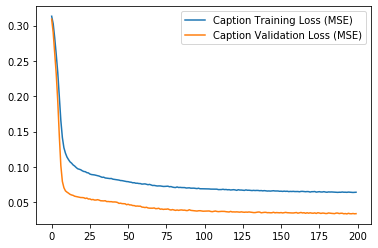

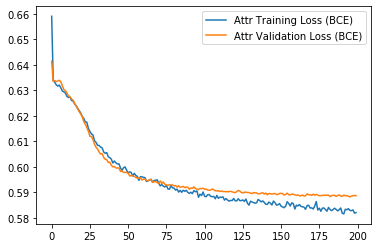

In [183]:
plot_save_dir = 'bird-gan-attributes-split-captions-concat-caption-loss-autoencoder'

# Val loss is lower because dropout isn't active during testing
# https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

plt.plot(history.history['caption_out_loss'], label="Caption Training Loss (MSE)")
plt.plot(history.history['val_caption_out_loss'], label="Caption Validation Loss (MSE)")
plt.legend()
plt.savefig('./results/plots/'+plot_save_dir+'/autoencoder_caption_loss.png')
plt.show()

plt.plot(history.history['attr_out_loss'], label="Attr Training Loss (BCE)")
plt.plot(history.history['val_attr_out_loss'], label="Attr Validation Loss (BCE)")
plt.legend()
plt.savefig('./results/plots/'+plot_save_dir+'/autoencoder_attr_loss.png')
plt.show()


In [184]:
autoencoder.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder/autoencoder-conv1d-200.h5')

In [214]:
# Just some testing
idx=452
print(a_test[idx])
output = autoencoder.predict(c_test[idx].reshape(1, -1))
print(np.round(output[1][0]))
print(output[1])

[0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
[[6.1302897e-05 8.9364759e-05 1.0199513e-02 1.0100426e-04 8.8350058e-01
  1.3875874e-04 7.2570026e-01 8.6927423e-03 7.5844806e-01 2.1034415e-01]]


In [242]:
# Extract encoder from autoencoder
autoencoder.load_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder/autoencoder-conv1d-200.h5')
encoder = Model(autoencoder.input, autoencoder.get_layer('attr_out').output)
# for layer in encoder.layers:
#     layer.trainable = True
encoder.summary()


Model: "model_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        [(None, 1024)]            0         
_________________________________________________________________
reshape_38 (Reshape)         (None, 1024, 1)           0         
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 512, 16)           64        
_________________________________________________________________
leaky_re_lu_183 (LeakyReLU)  (None, 512, 16)           0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 512, 16)           0         
_________________________________________________________________
conv1d_112 (Conv1D)          (None, 256, 32)           1568      
_________________________________________________________________
leaky_re_lu_184 (LeakyReLU)  (None, 256, 32)           0  

In [196]:
def make_generator_model(shape):
    
    noise_in = Input(shape=shape)
    captions_in = Input(shape=(1024,))
    
    c = encoder(captions_in)
    
    input_layer = concatenate([noise_in, c])
    
    x = Dense(16*16*64*2)(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Reshape((16, 16, 128))(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')(x)
    
    return Model([noise_in, captions_in], [x, c])

In [197]:
generator = make_generator_model((300,))
generator.summary()

Model: "model_41"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_50 (InputLayer)           [(None, 1024)]       0                                            
__________________________________________________________________________________________________
input_49 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
model_40 (Model)                (None, 10)           89770       input_50[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 310)          0           input_49[0][0]                   
                                                                 model_40[1][0]            

(1024,)


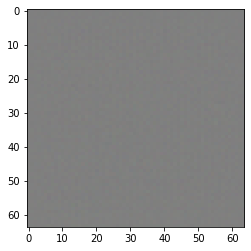

In [198]:
generator = make_generator_model((300,))

noise = np.random.normal(0, 1, 300)
label = train_captions[0]
print(label.shape)

generated_image = generator.predict( [np.array([noise]), np.array([label])] )[0][0]
plt.imshow(unnormalize_img(generated_image), )

In [199]:
def make_valid_discriminator_model():
    input_layer = Input((64, 64, 3))
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='valid')(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    
    x = Flatten()(x)
    x = Dense(64)(x) 
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    valid = Dense(1, activation='sigmoid')(x)
    
    return Model(input_layer, valid)

In [200]:
discriminator_valid = make_valid_discriminator_model()
discriminator_valid.summary()
valid = discriminator_valid.predict(np.array([generated_image]))


Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
valid (Conv2D)               (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_201 (LeakyReLU)  (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_79 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_202 (LeakyReLU)  (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_80 (Dropout)         (None, 32, 32, 64)        0  

In [201]:
def make_attr_discriminator_model():
    input_layer = Input((64, 64, 3))
    
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='attr')(input_layer)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)


#     x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
#     x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
#     x = Dense(128)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Dense(48)(x)
#     x = Dense(64)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    attr = Dense(10, activation='sigmoid')(x)
    
    return Model(input_layer, attr)

In [202]:
discriminator_attr = make_attr_discriminator_model()
discriminator_attr.summary()
attrs = discriminator_attr.predict(np.array([generated_image]))

Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_54 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
attr (Conv2D)                (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_206 (LeakyReLU)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_207 (LeakyReLU)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_208 (LeakyReLU)  (None, 16, 16, 128)       0  

In [245]:
cross_entropy = BinaryCrossentropy(from_logits=False)

@tf.function
def discriminator_valid_loss(real_output, fake_output, flip):
    
    if flip:
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.9, maxval=1.0)
        real_labels = tf.random.uniform(real_output.shape, minval=0.0, maxval=0.1)
    else:
        real_labels = tf.random.uniform(real_output.shape, minval=0.9, maxval=1.0)
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.0, maxval=0.1)

        
    real_loss = cross_entropy(real_labels, real_output)
    fake_loss = cross_entropy(fake_labels, fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

In [246]:
# mse = MeanSquaredError()

@tf.function
def discriminator_attribute_loss_real(real_output, real_attributes):
    return cross_entropy(real_output, real_attributes)

@tf.function
def discriminator_attribute_loss_fake(fake_output, fake_attributes):
    return cross_entropy(fake_output, fake_attributes)

In [247]:
@tf.function
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

@tf.function
def generator_attr_loss(fake_attr_output, sampled_attrs):
    return cross_entropy(fake_attr_output, sampled_attrs)

@tf.function
def generator_caption_loss(fake_caption_output, sampled_captions):
    return cross_entropy(fake_caption_output, sampled_captions)

In [260]:
@tf.function
def train_step(images, attrs, captions, sampled_attrs, sampled_captions, flip, warmup):
    noise = tf.random.truncated_normal([32, 300], dtype=tf.dtypes.float64)
    
#     sampled_attrs = tf.cast(tf.random.uniform([32, 312], minval=0, maxval=2, dtype='int32'), 'float32') # Need to make this smarter. Only one 1 per attr.
#     attrs = tf.reshape(attrs, (attrs.shape[0], 1))
    
    gen_losses = []
    gen_valid_losses = []
    gen_attr_losses = []
    gen_caption_losses = []
    disc_losses = []
    disc_real_losses = []
    disc_fake_losses = []
    disc_attr_real_losses = []
    disc_attr_fake_losses = []

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape_valid, tf.GradientTape() as disc_tape_attr:
        gen_tape.watch(generator.trainable_variables)
        disc_tape_valid.watch(discriminator_valid.trainable_variables)
        disc_tape_attr.watch(discriminator_attr.trainable_variables)
        
        generated_images, generated_attrs = generator([noise, sampled_captions], training=True)
        
        real_output = discriminator_valid(images, training=True)
        fake_output = discriminator_valid(generated_images, training=True)
        
        real_attr_output = discriminator_attr(images, training=True)
        fake_attr_output = discriminator_attr(generated_images, training=True)
        
        gen_valid_loss = generator_loss(fake_output)
        gen_attr_loss = generator_attr_loss(fake_attr_output, sampled_attrs)
        gen_caption_loss = generator_caption_loss(generated_attrs, sampled_attrs)
        gen_loss = ((2.0 - warmup) * gen_valid_loss + (warmup * (gen_attr_loss + gen_caption_loss)))
        
        disc_valid_loss, disc_real_loss, disc_fake_loss = discriminator_valid_loss(real_output, fake_output, flip)
        disc_attr_real_loss = discriminator_attribute_loss_real(real_attr_output, attrs)
        disc_attr_fake_loss = discriminator_attribute_loss_fake(fake_attr_output, sampled_attrs)
        disc_attr_loss = ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
#         disc_loss += ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
        
        
        gen_losses.append(K.mean(gen_loss))
        gen_valid_losses.append(K.mean(gen_valid_loss))
        gen_attr_losses.append(K.mean(gen_attr_loss))
        gen_caption_losses.append(K.mean(gen_caption_loss))
        disc_losses.append(K.mean(disc_valid_loss))
        disc_real_losses.append(K.mean(disc_real_loss))
        disc_fake_losses.append(K.mean(disc_fake_loss))
        disc_attr_real_losses.append(K.mean(disc_attr_real_loss))
        disc_attr_fake_losses.append(K.mean(disc_attr_fake_loss))
    
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)

    gradients_of_discriminator_valid = disc_tape_valid.gradient(disc_valid_loss, discriminator_valid.trainable_variables)
    
    gradients_of_discriminator_attr = disc_tape_attr.gradient(disc_attr_loss, discriminator_attr.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    discriminator_valid_optimizer.apply_gradients(zip(gradients_of_discriminator_valid, discriminator_valid.trainable_variables))
    
    discriminator_attr_optimizer.apply_gradients(zip(gradients_of_discriminator_attr, discriminator_attr.trainable_variables))

    return (gen_losses, gen_valid_losses, gen_attr_losses, gen_caption_losses, disc_losses, disc_real_losses, disc_fake_losses, disc_attr_real_losses, disc_attr_fake_losses)

In [207]:
def train(train_imgs, train_attrs, train_captions, epochs, warmup):
    gen_loss_all = []
    gen_valid_loss_all = []
    gen_attr_loss_all = []
    gen_caption_loss_all = []
    disc_loss_all = []
    disc_loss_real_all = []
    disc_loss_fake_all = []
    disc_attr_loss_real_all = []
    disc_attr_loss_fake_all = []
    warmup_step = 1./2000.
    
    num_samples = len(train_imgs)
    batch_counter = 0
    
    for epoch in range(epochs):
        start = time.time()
        
        gen_loss_epoch = [1, 0]
        gen_valid_loss_epoch = [1, 0]
        gen_attr_loss_epoch = [1, 0]
        gen_caption_loss_epoch = [1, 0]
        disc_loss_epoch = [1, 0]
        disc_loss_real_epoch = [1, 0]
        disc_loss_fake_epoch = [1, 0]
        disc_attr_loss_real_epoch = [1, 0]
        disc_attr_loss_fake_epoch = [1, 0]
        
        seed = np.random.randint(0, 10000)
        np.random.seed(seed)
        np.random.shuffle(train_imgs)
        np.random.seed(seed)
        np.random.shuffle(train_attrs)
        np.random.seed(seed)
        np.random.shuffle(train_captions)
        
        all_indices = np.arange(len(train_attrs))
        np.random.shuffle(all_indices)
        
        for idx, i in enumerate(range(0, num_samples - 32, 32)):
            
            sampled_indices = all_indices[i:(i+32)]
            
            gen_loss_batch, gen_valid_loss_batch, gen_attr_loss_batch, gen_caption_loss_batch, disc_loss_batch, disc_loss_real_batch, disc_loss_fake_batch, disc_attr_loss_real_batch, disc_attr_loss_fake_batch = train_step(train_imgs[i:(i+32)], train_attrs[i:(i+32)], train_captions[i:(i+32)], train_attrs[sampled_indices], train_captions[sampled_indices], batch_counter % 20 == 0, tf.constant(warmup, dtype='float32'))

            gen_loss_epoch[0] += 1
            gen_valid_loss_epoch[0] += 1
            gen_attr_loss_epoch[0] += 1
            gen_caption_loss_epoch[0] += 1
            disc_loss_epoch[0] += 1
            disc_loss_real_epoch[0] += 1
            disc_loss_fake_epoch[0] += 1
            disc_attr_loss_real_epoch[0] += 1
            disc_attr_loss_fake_epoch[0] += 1
            gen_loss_epoch[1] += np.mean(gen_loss_batch)
            gen_valid_loss_epoch[1] += np.mean(gen_valid_loss_batch)
            gen_attr_loss_epoch[1] += np.mean(gen_attr_loss_batch)
            gen_caption_loss_epoch[1] += np.mean(gen_caption_loss_batch)
            disc_loss_epoch[1] += np.mean(disc_loss_batch)
            disc_loss_real_epoch[1] += np.mean(disc_loss_real_batch)
            disc_loss_fake_epoch[1] += np.mean(disc_loss_fake_batch)
            disc_attr_loss_real_epoch[1] += np.mean(disc_attr_loss_real_batch)
            disc_attr_loss_fake_epoch[1] += np.mean(disc_attr_loss_fake_batch)
            
            batch_counter += 1
            
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        print(f'Gen loss: {gen_loss_epoch[1]/gen_loss_epoch[0]}, Gen valid loss: {gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0]}, Gen attr loss: {gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0]}, Gen caption loss: {gen_caption_loss_epoch[1]/gen_caption_loss_epoch[0]}, Disc valid loss: {disc_loss_epoch[1]/disc_loss_epoch[0]}, Disc valid real loss: {disc_loss_real_epoch[1]/disc_loss_real_epoch[0]}, Disc valid fake loss: {disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0]}, Disc attr loss: {(disc_attr_loss_real_epoch[1] + disc_attr_loss_fake_epoch[1])/(disc_attr_loss_real_epoch[0])}, Disc attr real loss: {disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0]}, Disc attr fake loss: {disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0]}')
        
        gen_loss_all.append(gen_loss_epoch[1]/gen_loss_epoch[0])
        gen_valid_loss_all.append(gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0])
        gen_attr_loss_all.append(gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0])
        gen_caption_loss_all.append(gen_caption_loss_epoch[1]/gen_caption_loss_epoch[0])
        disc_loss_all.append(disc_loss_epoch[1]/disc_loss_epoch[0])
        disc_loss_real_all.append(disc_loss_real_epoch[1]/disc_loss_real_epoch[0])
        disc_loss_fake_all.append(disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0])
        disc_attr_loss_real_all.append(disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0])
        disc_attr_loss_fake_all.append(disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0])
        
        if warmup < 1:
            warmup += warmup_step
    
    return (gen_loss_all, gen_valid_loss_all, gen_attr_loss_all, gen_caption_loss_all, disc_loss_all, disc_loss_real_all, disc_loss_fake_all, disc_attr_loss_real_all, disc_attr_loss_fake_all, warmup)
    


In [208]:
def long_train(starting_checkpoint=0, num_checkpoints=0, checkpoint_interval=0, g_hist=None, g_valid_hist=None, g_attr_hist=None, g_caption_hist=None, d_hist=None, d_real_hist=None, d_fake_hist=None, d_attr_real_hist=None, d_attr_fake_hist=None, noise=None, caption=None, save_files=False, warmup=0.):

    for i in range(starting_checkpoint, starting_checkpoint + num_checkpoints):
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('')
        print(f'Starting checkpoint {i}')
        print('')
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        
        gen_temp, gen_valid_temp, gen_attr_temp, gen_caption_temp, disc_temp, disc_real_temp, disc_fake_temp, disc_attr_real_temp, disc_attr_fake_temp, warmup = train(train_imgs, train_attrs, train_captions, checkpoint_interval, warmup)
        
        g_hist += gen_temp
        g_valid_hist += gen_valid_temp
        g_attr_hist += gen_attr_temp
        g_caption_hist += gen_caption_temp
        d_hist += disc_temp
        d_real_hist += disc_real_temp
        d_fake_hist += disc_fake_temp
        d_attr_real_hist += disc_attr_real_temp
        d_attr_fake_hist += disc_attr_fake_temp
        generated_image = generator.predict( [np.array([noise]), np.array([caption])])[0][0]
        plt.imshow(unnormalize_img(generated_image))
        if save_files:
            plt.savefig('./results/prog-imgs/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder/' + str((i+1)*checkpoint_interval) + '.png')
        plt.show()
        if save_files:
            generator.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder/gen_weights_attributes_split_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_valid.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder/disc_weights_attributes_split_valid_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_attr.save_weights('./results/weights/bird-gan-attributes-split-captions-concat-caption-loss-autoencoder/disc_weights_attributes_split_attr_' + str((i+1)*checkpoint_interval) + '.h5')
    
    return starting_checkpoint + num_checkpoints, totalepochs, warmup

In [258]:
discriminator_valid = make_valid_discriminator_model()
discriminator_attr = make_attr_discriminator_model()
generator = make_generator_model((300,))
generator_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_valid_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_attr_optimizer = Adam(1e-5, beta_1=0.5)

In [259]:
# To get passed into training function and get modified
# Run cell when starting from scratch
gen_loss_hist = []
gen_valid_loss_hist = []
gen_attr_loss_hist = []
gen_caption_loss_hist = []
disc_loss_hist = []
disc_loss_real_hist = []
disc_loss_fake_hist = []
disc_attr_loss_real_hist = []
disc_attr_loss_fake_hist = []
noise300 = np.random.normal(0, 1, 300)
caption = train_captions[5000]
next_starting_checkpoint = 0
totalepochs = 0
warmup = 1.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 0

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 40.36514186859131 sec
Gen loss: 12.391587058380043, Gen valid loss: 1.5317996815402253, Gen attr loss: 5.933877585703119, Gen caption loss: 4.925909775059398, Disc valid loss: 1.0742556239531291, Disc valid real loss: 0.5529154501956329, Disc valid fake loss: 0.5213401726671674, Disc attr loss: 11.998949994239704, Disc attr real loss: 6.065072408536586, Disc attr fake loss: 5.933877585703119
Time for epoch 2 is 37.1988091468811 sec
Gen loss: 11.095052827664507, Gen valid loss: 0.9545957522017523, Gen attr loss: 5.264137973630332, Gen caption loss: 4.876319107970571, Disc valid loss: 1.1961207297759326, Disc valid real loss: 0.6038035856999033, Disc valid fake loss: 0.5923171431876133, Disc attr loss: 10.680678031631924, Disc attr real loss: 5.416540058001593, Disc attr fake loss: 5.264137973630332
Time for epoch 3 is 37.36254048347473 sec
Gen loss: 10.

Time for epoch 21 is 37.981953859329224 sec
Gen loss: 10.927208329280864, Gen valid loss: 1.2468038482394646, Gen attr loss: 4.930816660728558, Gen caption loss: 4.74958782725864, Disc valid loss: 1.0775847796825213, Disc valid real loss: 0.5687749197651054, Disc valid fake loss: 0.5088098591905299, Disc attr loss: 9.755427380564413, Disc attr real loss: 4.824610719835855, Disc attr fake loss: 4.930816660728558
Time for epoch 22 is 38.06198716163635 sec
Gen loss: 10.956569914572285, Gen valid loss: 1.278610046478468, Gen attr loss: 4.922087027774594, Gen caption loss: 4.755872842096055, Disc valid loss: 1.0721848411611747, Disc valid real loss: 0.5731343333798695, Disc valid fake loss: 0.49905050689288916, Disc attr loss: 9.74189093248631, Disc attr real loss: 4.819803904711716, Disc attr fake loss: 4.922087027774594
Time for epoch 23 is 38.30181097984314 sec
Gen loss: 10.97418737282275, Gen valid loss: 1.2965233377647918, Gen attr loss: 4.9325785191078495, Gen caption loss: 4.74508550

Time for epoch 41 is 38.08029770851135 sec
Gen loss: 11.104799350748863, Gen valid loss: 1.4397388712823553, Gen attr loss: 4.939069907516645, Gen caption loss: 4.725990574534347, Disc valid loss: 1.0040178728620535, Disc valid real loss: 0.536813483247912, Disc valid fake loss: 0.46720439139097364, Disc attr loss: 9.700768921110365, Disc attr real loss: 4.76169901359372, Disc attr fake loss: 4.939069907516645
Time for epoch 42 is 37.99032974243164 sec
Gen loss: 11.110491473500321, Gen valid loss: 1.460051052292511, Gen attr loss: 4.9222967508362565, Gen caption loss: 4.728143655187715, Disc valid loss: 0.9891379094382289, Disc valid real loss: 0.5274298976107341, Disc valid fake loss: 0.4617080109390786, Disc attr loss: 9.686581907556633, Disc attr real loss: 4.764285156720376, Disc attr fake loss: 4.9222967508362565
Time for epoch 43 is 37.9252073764801 sec
Gen loss: 11.09182779575751, Gen valid loss: 1.4464471072039307, Gen attr loss: 4.913887320495233, Gen caption loss: 4.731493367

Time for epoch 61 is 37.85052037239075 sec
Gen loss: 11.098619727261344, Gen valid loss: 1.467189130905844, Gen attr loss: 4.913938987545851, Gen caption loss: 4.717491616401569, Disc valid loss: 0.9986250492615428, Disc valid real loss: 0.5331038884354155, Disc valid fake loss: 0.4655211612299529, Disc attr loss: 9.633053399036893, Disc attr real loss: 4.719114411491042, Disc attr fake loss: 4.913938987545851
Time for epoch 62 is 38.11371827125549 sec
Gen loss: 11.051819377475315, Gen valid loss: 1.4549161620579438, Gen attr loss: 4.881963008787574, Gen caption loss: 4.714940210021931, Disc valid loss: 0.9905930017714255, Disc valid real loss: 0.5312080464065883, Disc valid fake loss: 0.45938495536483726, Disc attr loss: 9.603261136750218, Disc attr real loss: 4.721298127962645, Disc attr fake loss: 4.881963008787574
Time for epoch 63 is 38.10663890838623 sec
Gen loss: 11.093492775428587, Gen valid loss: 1.461194010284858, Gen attr loss: 4.917138583614897, Gen caption loss: 4.71516019

Time for epoch 81 is 38.09962606430054 sec
Gen loss: 11.027787355872674, Gen valid loss: 1.4855794901770305, Gen attr loss: 4.85355107312603, Gen caption loss: 4.688656786916056, Disc valid loss: 0.980221310120611, Disc valid real loss: 0.5199035713827707, Disc valid fake loss: 0.4603177394647262, Disc attr loss: 9.54222536022424, Disc attr real loss: 4.68867428709821, Disc attr fake loss: 4.85355107312603
Time for epoch 82 is 38.073450565338135 sec
Gen loss: 11.043180132299904, Gen valid loss: 1.4886433779385677, Gen attr loss: 4.8741489548670245, Gen caption loss: 4.68038777413407, Disc valid loss: 0.9943337232116761, Disc valid real loss: 0.5258184692400903, Disc valid fake loss: 0.4685152522755186, Disc attr loss: 9.558157327052378, Disc attr real loss: 4.684008372185353, Disc attr fake loss: 4.8741489548670245
Time for epoch 83 is 38.04867148399353 sec
Gen loss: 11.109558469880888, Gen valid loss: 1.5076056266541726, Gen attr loss: 4.893381496755088, Gen caption loss: 4.7085713642

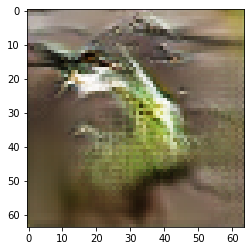

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 1

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.0795214176178 sec
Gen loss: 11.09112751968508, Gen valid loss: 1.5192994812962808, Gen attr loss: 4.871102355683076, Gen caption loss: 4.700725720826849, Disc valid loss: 0.9788007296843904, Disc valid real loss: 0.5157754851712121, Disc valid fake loss: 0.46302524326131916, Disc attr loss: 9.465041023605885, Disc attr real loss: 4.593938667922808, Disc attr fake loss: 4.871102355683076
Time for epoch 2 is 37.990320920944214 sec
Gen loss: 11.01862675581521, Gen valid loss: 1.4892519804520337, Gen attr loss: 4.838959488442273, Gen caption loss: 4.69041528352877, Disc valid loss: 0.9771563213692125, Disc valid real loss: 0.5230862109803249, Disc valid fake loss: 0.4540701109542433, Disc attr loss: 9.426534554499598, Disc attr real loss: 4.587575066057324, Disc attr fake loss: 4.838959488442273
Time for epoch 3 is 38.05708026885986 sec
Gen loss: 11.056

Time for epoch 21 is 38.051411628723145 sec
Gen loss: 11.040312953111602, Gen valid loss: 1.5441887575759474, Gen attr loss: 4.80834821440017, Gen caption loss: 4.68777597758182, Disc valid loss: 0.9707116663940554, Disc valid real loss: 0.5161381027885892, Disc valid fake loss: 0.4545735622324595, Disc attr loss: 9.332579265118937, Disc attr real loss: 4.524231050718767, Disc attr fake loss: 4.80834821440017
Time for epoch 22 is 38.0498628616333 sec
Gen loss: 11.020025385104544, Gen valid loss: 1.5279179701637122, Gen attr loss: 4.797323131948952, Gen caption loss: 4.694784282668819, Disc valid loss: 0.9685682594614623, Disc valid real loss: 0.514613776591412, Disc valid fake loss: 0.45395448351617107, Disc attr loss: 9.318636533690661, Disc attr real loss: 4.52131340174171, Disc attr fake loss: 4.797323131948952
Time for epoch 23 is 38.12664771080017 sec
Gen loss: 11.009720275072548, Gen valid loss: 1.530739382838169, Gen attr loss: 4.790369079041933, Gen caption loss: 4.688611811738

Time for epoch 41 is 38.1456401348114 sec
Gen loss: 11.005504990657817, Gen valid loss: 1.5395047196204745, Gen attr loss: 4.7734062038462985, Gen caption loss: 4.692594046192117, Disc valid loss: 0.9703114270194759, Disc valid real loss: 0.5071963238199229, Disc valid fake loss: 0.46311510360337854, Disc attr loss: 9.240324718196218, Disc attr real loss: 4.46691851434992, Disc attr fake loss: 4.7734062038462985
Time for epoch 42 is 38.039209604263306 sec
Gen loss: 11.001081097093701, Gen valid loss: 1.5320762521852322, Gen attr loss: 4.775065293480064, Gen caption loss: 4.693939535275384, Disc valid loss: 0.963373003613335, Disc valid real loss: 0.509398223988732, Disc valid fake loss: 0.4539747791400124, Disc attr loss: 9.245575666427612, Disc attr real loss: 4.470510372947548, Disc attr fake loss: 4.775065293480064
Time for epoch 43 is 38.262603759765625 sec
Gen loss: 10.953244454815458, Gen valid loss: 1.5182914541665777, Gen attr loss: 4.760101361649469, Gen caption loss: 4.674851

Time for epoch 61 is 38.07062602043152 sec
Gen loss: 11.011299471868085, Gen valid loss: 1.5361813334268606, Gen attr loss: 4.781508930976475, Gen caption loss: 4.69360916724373, Disc valid loss: 0.9708468494053456, Disc valid real loss: 0.5154927113676459, Disc valid fake loss: 0.45535413892611576, Disc attr loss: 9.214798411056602, Disc attr real loss: 4.433289480080126, Disc attr fake loss: 4.781508930976475
Time for epoch 62 is 38.31096839904785 sec
Gen loss: 10.995012903601173, Gen valid loss: 1.531256276579084, Gen attr loss: 4.776241464020437, Gen caption loss: 4.687515141841196, Disc valid loss: 0.9739877938578122, Disc valid real loss: 0.5132311949238868, Disc valid fake loss: 0.4607565982878047, Disc attr loss: 9.207208630838368, Disc attr real loss: 4.430967166817931, Disc attr fake loss: 4.776241464020437
Time for epoch 63 is 38.00875449180603 sec
Gen loss: 10.933508699825463, Gen valid loss: 1.5145344409516188, Gen attr loss: 4.747635709560983, Gen caption loss: 4.67133855

Time for epoch 81 is 38.1530556678772 sec
Gen loss: 10.956804280681661, Gen valid loss: 1.5426634708394202, Gen attr loss: 4.7537114497445785, Gen caption loss: 4.660429375604562, Disc valid loss: 0.9701267723145524, Disc valid real loss: 0.5135489158271774, Disc valid fake loss: 0.45657785656814004, Disc attr loss: 9.148966893917176, Disc attr real loss: 4.395255444172598, Disc attr fake loss: 4.7537114497445785
Time for epoch 82 is 38.140515089035034 sec
Gen loss: 10.967992353568555, Gen valid loss: 1.501817566754049, Gen attr loss: 4.785020275167656, Gen caption loss: 4.68115448822497, Disc valid loss: 0.9740995239759203, Disc valid real loss: 0.5115470876538657, Disc valid fake loss: 0.46255243607975927, Disc attr loss: 9.177137046002438, Disc attr real loss: 4.392116770834781, Disc attr fake loss: 4.785020275167656
Time for epoch 83 is 38.19651937484741 sec
Gen loss: 10.931700318809447, Gen valid loss: 1.5085137468689502, Gen attr loss: 4.750370868176303, Gen caption loss: 4.67281

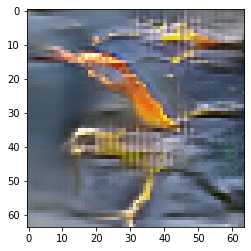

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 2

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.152623414993286 sec
Gen loss: 10.93643081220508, Gen valid loss: 1.507727867865627, Gen attr loss: 4.756054991306005, Gen caption loss: 4.672647967248105, Disc valid loss: 0.9868973165669739, Disc valid real loss: 0.5156494236897001, Disc valid fake loss: 0.4712478939272201, Disc attr loss: 9.116221201129076, Disc attr real loss: 4.3601662098230705, Disc attr fake loss: 4.756054991306005
Time for epoch 2 is 38.22540020942688 sec
Gen loss: 10.961083040004823, Gen valid loss: 1.5358380825538946, Gen attr loss: 4.7632894535374835, Gen caption loss: 4.661955529112157, Disc valid loss: 0.9684542462754702, Disc valid real loss: 0.5125009433686895, Disc valid fake loss: 0.4559532998377069, Disc attr loss: 9.12752817252141, Disc attr real loss: 4.364238718983927, Disc attr fake loss: 4.7632894535374835
Time for epoch 3 is 38.17274594306946 sec
Gen loss: 10.

Time for epoch 21 is 38.19764280319214 sec
Gen loss: 10.941010374363845, Gen valid loss: 1.5197830009589672, Gen attr loss: 4.749246493264589, Gen caption loss: 4.671980854618517, Disc valid loss: 0.9809269708023485, Disc valid real loss: 0.515990328498003, Disc valid fake loss: 0.4649366409313388, Disc attr loss: 9.081453060393088, Disc attr real loss: 4.332206567128499, Disc attr fake loss: 4.749246493264589
Time for epoch 22 is 38.1902539730072 sec
Gen loss: 10.996110443177262, Gen valid loss: 1.5225405444297686, Gen attr loss: 4.782664468941004, Gen caption loss: 4.690905410745926, Disc valid loss: 0.9719452722285821, Disc valid real loss: 0.5121710012921796, Disc valid fake loss: 0.45977427255170455, Disc attr loss: 9.111713742822166, Disc attr real loss: 4.329049273881163, Disc attr fake loss: 4.782664468941004
Time for epoch 23 is 38.17557334899902 sec
Gen loss: 11.0235869916797, Gen valid loss: 1.51926327575513, Gen attr loss: 4.8078476898069304, Gen caption loss: 4.69647600915

Time for epoch 41 is 38.214930057525635 sec
Gen loss: 10.952393092437164, Gen valid loss: 1.5155161809792042, Gen attr loss: 4.765770958044988, Gen caption loss: 4.671105927568141, Disc valid loss: 0.9776385663970699, Disc valid real loss: 0.5138134742332344, Disc valid fake loss: 0.4638250917600099, Disc attr loss: 9.06769628511858, Disc attr real loss: 4.301925327073591, Disc attr fake loss: 4.765770958044988
Time for epoch 42 is 38.26673436164856 sec
Gen loss: 10.91644129972794, Gen valid loss: 1.5162786733167282, Gen attr loss: 4.738160601799404, Gen caption loss: 4.662001978091108, Disc valid loss: 0.97672046442342, Disc valid real loss: 0.5085756541267643, Disc valid fake loss: 0.46814480755064225, Disc attr loss: 9.043227472925574, Disc attr real loss: 4.3050668711261695, Disc attr fake loss: 4.738160601799404
Time for epoch 43 is 38.29398775100708 sec
Gen loss: 10.952707551682222, Gen valid loss: 1.522612800766136, Gen attr loss: 4.764891472612293, Gen caption loss: 4.665203285

Time for epoch 61 is 38.13960242271423 sec
Gen loss: 10.96142296674775, Gen valid loss: 1.5174980095731534, Gen attr loss: 4.7680361316133, Gen caption loss: 4.675888825884356, Disc valid loss: 0.9789689866507926, Disc valid real loss: 0.5137979864751098, Disc valid fake loss: 0.4651709982373204, Disc attr loss: 9.043757421214407, Disc attr real loss: 4.2757212896011065, Disc attr fake loss: 4.7680361316133
Time for epoch 62 is 38.18945574760437 sec
Gen loss: 10.87785690328293, Gen valid loss: 1.5141286791824713, Gen attr loss: 4.716443874002472, Gen caption loss: 4.647284333944967, Disc valid loss: 0.9751571066334319, Disc valid real loss: 0.5115842844251048, Disc valid fake loss: 0.4635728214814411, Disc attr loss: 8.992093088181038, Disc attr real loss: 4.275649214178566, Disc attr fake loss: 4.716443874002472
Time for epoch 63 is 38.04267621040344 sec
Gen loss: 10.949826307736116, Gen valid loss: 1.5189554256798452, Gen attr loss: 4.757218642609552, Gen caption loss: 4.673652245746

Time for epoch 81 is 38.01667237281799 sec
Gen loss: 10.976559786292595, Gen valid loss: 1.5279185655640393, Gen attr loss: 4.770482572436656, Gen caption loss: 4.678158650230263, Disc valid loss: 0.9794544941041528, Disc valid real loss: 0.5171442023783841, Disc valid fake loss: 0.4623102902719968, Disc attr loss: 9.033359942397452, Disc attr real loss: 4.262877369960795, Disc attr fake loss: 4.770482572436656
Time for epoch 82 is 38.141337156295776 sec
Gen loss: 10.895650015936958, Gen valid loss: 1.5060218102563687, Gen attr loss: 4.735039461595902, Gen caption loss: 4.654588796258942, Disc valid loss: 0.9722189798264645, Disc valid real loss: 0.5092347836914425, Disc valid fake loss: 0.46298419403512947, Disc attr loss: 8.99473559953333, Disc attr real loss: 4.259696137937427, Disc attr fake loss: 4.735039461595902
Time for epoch 83 is 38.03506016731262 sec
Gen loss: 10.929885318931849, Gen valid loss: 1.49517881256455, Gen attr loss: 4.7673106587676175, Gen caption loss: 4.6673958

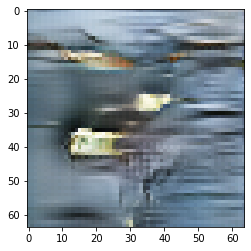

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 3

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.26071095466614 sec
Gen loss: 10.893443342792956, Gen valid loss: 1.529478998365118, Gen attr loss: 4.727199354145908, Gen caption loss: 4.636764986405205, Disc valid loss: 0.9785171882893012, Disc valid real loss: 0.5116211567629321, Disc valid fake loss: 0.4668960312840738, Disc attr loss: 8.965007385910365, Disc attr real loss: 4.237808031764457, Disc attr fake loss: 4.727199354145908
Time for epoch 2 is 38.330944299697876 sec
Gen loss: 10.920084103013119, Gen valid loss: 1.529714876074132, Gen attr loss: 4.738589787547827, Gen caption loss: 4.651779444883187, Disc valid loss: 0.9611503270260364, Disc valid real loss: 0.5041825991012863, Disc valid fake loss: 0.4569677274401595, Disc attr loss: 8.972730873723018, Disc attr real loss: 4.23414108617519, Disc attr fake loss: 4.738589787547827
Time for epoch 3 is 38.313334226608276 sec
Gen loss: 10.97

Time for epoch 21 is 38.086159467697144 sec
Gen loss: 10.97596175496171, Gen valid loss: 1.5289815599679302, Gen attr loss: 4.769607931617799, Gen caption loss: 4.677372210071016, Disc valid loss: 0.9733717431867026, Disc valid real loss: 0.5063517546750665, Disc valid fake loss: 0.46701998616944806, Disc attr loss: 8.988766671519292, Disc attr real loss: 4.219158739901493, Disc attr fake loss: 4.769607931617799
Time for epoch 22 is 38.504703521728516 sec
Gen loss: 10.965824618249082, Gen valid loss: 1.5451311964975787, Gen attr loss: 4.75357928120993, Gen caption loss: 4.667114118250405, Disc valid loss: 0.9582868906540599, Disc valid real loss: 0.49690482836105637, Disc valid fake loss: 0.4613820616065002, Disc attr loss: 8.96729194827196, Disc attr real loss: 4.213712667062031, Disc attr fake loss: 4.75357928120993
Time for epoch 23 is 38.34412884712219 sec
Gen loss: 10.9554803016063, Gen valid loss: 1.5373125919481603, Gen attr loss: 4.759374407248768, Gen caption loss: 4.658793335

Time for epoch 41 is 38.4037971496582 sec
Gen loss: 10.959775381941137, Gen valid loss: 1.5255456589424836, Gen attr loss: 4.761877013415825, Gen caption loss: 4.672352732681647, Disc valid loss: 0.9799359657254, Disc valid real loss: 0.5115513114263694, Disc valid fake loss: 0.4683846553489768, Disc attr loss: 8.963859381068367, Disc attr real loss: 4.201982367652541, Disc attr fake loss: 4.761877013415825
Time for epoch 42 is 38.390069246292114 sec
Gen loss: 10.918274853610734, Gen valid loss: 1.5413970595129782, Gen attr loss: 4.727681641979269, Gen caption loss: 4.649196129181198, Disc valid loss: 0.9609096387860575, Disc valid real loss: 0.4998962565812315, Disc valid fake loss: 0.4610133829317119, Disc attr loss: 8.92363405098437, Disc attr real loss: 4.1959524090051, Disc attr fake loss: 4.727681641979269
Time for epoch 43 is 38.21701908111572 sec
Gen loss: 10.911511183431156, Gen valid loss: 1.5320133369789537, Gen attr loss: 4.731820244776201, Gen caption loss: 4.6476775882689

Time for epoch 61 is 38.33223080635071 sec
Gen loss: 10.892244967018685, Gen valid loss: 1.532372932123944, Gen attr loss: 4.7236377566164425, Gen caption loss: 4.636234323506756, Disc valid loss: 0.9733402997174561, Disc valid real loss: 0.5113714032864506, Disc valid fake loss: 0.46196889707712624, Disc attr loss: 8.90328459364935, Disc attr real loss: 4.179646837032907, Disc attr fake loss: 4.7236377566164425
Time for epoch 62 is 38.349446535110474 sec
Gen loss: 10.977167266494213, Gen valid loss: 1.5542926452347257, Gen attr loss: 4.755890473440734, Gen caption loss: 4.666984158802808, Disc valid loss: 0.961954319218633, Disc valid real loss: 0.5115747624619543, Disc valid fake loss: 0.4503795583719807, Disc attr loss: 8.937794077364087, Disc attr real loss: 4.181903603923353, Disc attr fake loss: 4.755890473440734
Time for epoch 63 is 38.32697629928589 sec
Gen loss: 10.956619901062673, Gen valid loss: 1.5336703163821523, Gen attr loss: 4.756079230528214, Gen caption loss: 4.666870

Time for epoch 81 is 38.124642848968506 sec
Gen loss: 10.924982910879905, Gen valid loss: 1.5412100236913375, Gen attr loss: 4.725678523381551, Gen caption loss: 4.658094349269298, Disc valid loss: 0.9707915487328196, Disc valid real loss: 0.5100084728180232, Disc valid fake loss: 0.46078307510714545, Disc attr loss: 8.890326713804953, Disc attr real loss: 4.164648190423402, Disc attr fake loss: 4.725678523381551
Time for epoch 82 is 38.046911001205444 sec
Gen loss: 10.928547912173801, Gen valid loss: 1.5311062226127479, Gen attr loss: 4.735173061934267, Gen caption loss: 4.662268617288853, Disc valid loss: 0.9698555895952674, Disc valid real loss: 0.508093238603778, Disc valid fake loss: 0.4617623540605633, Disc attr loss: 8.903952145641089, Disc attr real loss: 4.168779083706823, Disc attr fake loss: 4.735173061934267
Time for epoch 83 is 38.07388734817505 sec
Gen loss: 10.895552805768766, Gen valid loss: 1.5446849851427362, Gen attr loss: 4.70930702382633, Gen caption loss: 4.641560

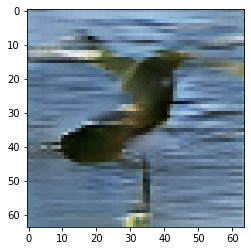

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 4

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.29254627227783 sec
Gen loss: 10.937426197496533, Gen valid loss: 1.5530622406057548, Gen attr loss: 4.7382380787919205, Gen caption loss: 4.646125877452737, Disc valid loss: 0.9709535174899631, Disc valid real loss: 0.5052928487621349, Disc valid fake loss: 0.4656606672740564, Disc attr loss: 8.896325137233992, Disc attr real loss: 4.158087058442072, Disc attr fake loss: 4.7382380787919205
Time for epoch 2 is 38.1299352645874 sec
Gen loss: 10.943171620045897, Gen valid loss: 1.5348571244940201, Gen attr loss: 4.738885827180816, Gen caption loss: 4.669428639295624, Disc valid loss: 0.9614716979869335, Disc valid real loss: 0.5059217381768111, Disc valid fake loss: 0.45554996215231053, Disc attr loss: 8.886639514266637, Disc attr real loss: 4.147753687085821, Disc attr fake loss: 4.738885827180816
Time for epoch 3 is 38.45007634162903 sec
Gen loss: 10

Time for epoch 21 is 38.25300407409668 sec
Gen loss: 10.921003527757598, Gen valid loss: 1.5327555561453345, Gen attr loss: 4.736616336233247, Gen caption loss: 4.651631642809405, Disc valid loss: 0.9691384366857327, Disc valid real loss: 0.5082691895767926, Disc valid fake loss: 0.46086924630128917, Disc attr loss: 8.874694376457029, Disc attr real loss: 4.138078040223781, Disc attr fake loss: 4.736616336233247
Time for epoch 22 is 38.146156549453735 sec
Gen loss: 10.89346960372718, Gen valid loss: 1.5516470523707588, Gen attr loss: 4.703788603547466, Gen caption loss: 4.638033923740956, Disc valid loss: 0.9624146765809718, Disc valid real loss: 0.503154751569598, Disc valid fake loss: 0.4592599266266758, Disc attr loss: 8.845013119663973, Disc attr real loss: 4.141224516116507, Disc attr fake loss: 4.703788603547466
Time for epoch 23 is 38.29853439331055 sec
Gen loss: 10.915184393161681, Gen valid loss: 1.5197784852206222, Gen attr loss: 4.7287184920737415, Gen caption loss: 4.666687

Time for epoch 41 is 38.220035791397095 sec
Gen loss: 10.88330845716523, Gen valid loss: 1.5132915996277558, Gen attr loss: 4.718053067602763, Gen caption loss: 4.651963794134496, Disc valid loss: 0.9836272703922861, Disc valid real loss: 0.5155261934288149, Disc valid fake loss: 0.4681010767211759, Disc attr loss: 8.844097437897348, Disc attr real loss: 4.126044370294586, Disc attr fake loss: 4.718053067602763
Time for epoch 42 is 38.210981369018555 sec
Gen loss: 10.898341021240565, Gen valid loss: 1.538717223699823, Gen attr loss: 4.712382865792044, Gen caption loss: 4.6472409004118385, Disc valid loss: 0.9650745230315501, Disc valid real loss: 0.5063784569905703, Disc valid fake loss: 0.4586960669293959, Disc attr loss: 8.838459011015853, Disc attr real loss: 4.126076145223808, Disc attr fake loss: 4.712382865792044
Time for epoch 43 is 38.16668891906738 sec
Gen loss: 10.961750464710763, Gen valid loss: 1.5283676794550929, Gen attr loss: 4.759538804935569, Gen caption loss: 4.673844

Time for epoch 61 is 38.212682485580444 sec
Gen loss: 10.988673086088847, Gen valid loss: 1.566538580064851, Gen attr loss: 4.760676325175174, Gen caption loss: 4.661458160172956, Disc valid loss: 0.9660963516248274, Disc valid real loss: 0.5052162000157323, Disc valid fake loss: 0.46088015387051795, Disc attr loss: 8.873301182335954, Disc attr real loss: 4.11262485716078, Disc attr fake loss: 4.760676325175174
Time for epoch 62 is 38.20398473739624 sec
Gen loss: 10.89514215981088, Gen valid loss: 1.530941073810505, Gen attr loss: 4.714051119357267, Gen caption loss: 4.650149952751511, Disc valid loss: 0.9723953173412541, Disc valid real loss: 0.5061381964018028, Disc valid fake loss: 0.46625711859726326, Disc attr loss: 8.826053141901486, Disc attr real loss: 4.11200202254422, Disc attr fake loss: 4.714051119357267
Time for epoch 63 is 38.23754286766052 sec
Gen loss: 11.004235310283134, Gen valid loss: 1.5642173855608394, Gen attr loss: 4.769151008549098, Gen caption loss: 4.670866908

Time for epoch 81 is 38.20789432525635 sec
Gen loss: 10.91551702907738, Gen valid loss: 1.541793718570616, Gen attr loss: 4.719466698525075, Gen caption loss: 4.65425663653428, Disc valid loss: 0.9753962498370224, Disc valid real loss: 0.5104626673993057, Disc valid fake loss: 0.46493358276077723, Disc attr loss: 8.818640996447101, Disc attr real loss: 4.099174297922026, Disc attr fake loss: 4.719466698525075
Time for epoch 82 is 38.19423532485962 sec
Gen loss: 10.925817657615434, Gen valid loss: 1.5336179707431534, Gen attr loss: 4.73979212727327, Gen caption loss: 4.652407563475736, Disc valid loss: 0.9642941798298017, Disc valid real loss: 0.5047619556831474, Disc valid fake loss: 0.4595322257619563, Disc attr loss: 8.849640868220549, Disc attr real loss: 4.109848740947279, Disc attr fake loss: 4.73979212727327
Time for epoch 83 is 38.16201686859131 sec
Gen loss: 10.963006567502733, Gen valid loss: 1.5289801221875963, Gen attr loss: 4.763218472643596, Gen caption loss: 4.67080798058

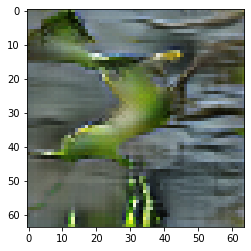

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 5

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.92391514778137 sec
Gen loss: 10.936228609989652, Gen valid loss: 1.5433657221031707, Gen attr loss: 4.7319076313235895, Gen caption loss: 4.660955240409872, Disc valid loss: 0.9735765881977754, Disc valid real loss: 0.5091338950767104, Disc valid fake loss: 0.46444269199035354, Disc attr loss: 8.826259415324142, Disc attr real loss: 4.094351784000552, Disc attr fake loss: 4.7319076313235895
Time for epoch 2 is 38.11498665809631 sec
Gen loss: 10.964624771903846, Gen valid loss: 1.5671245657654636, Gen attr loss: 4.742969642809736, Gen caption loss: 4.654530583358392, Disc valid loss: 0.958189941518675, Disc valid real loss: 0.49628020705892467, Disc valid fake loss: 0.4619097331675088, Disc attr loss: 8.839691479354693, Disc attr real loss: 4.096721836544957, Disc attr fake loss: 4.742969642809736
Time for epoch 3 is 38.188172340393066 sec
Gen loss: 

Time for epoch 21 is 37.94419026374817 sec
Gen loss: 10.951578406460563, Gen valid loss: 1.54470373637631, Gen attr loss: 4.749116087993632, Gen caption loss: 4.657758596466809, Disc valid loss: 0.9650215141495392, Disc valid real loss: 0.5081506368267504, Disc valid fake loss: 0.4568708778881445, Disc attr loss: 8.833472333303312, Disc attr real loss: 4.08435624530968, Disc attr fake loss: 4.749116087993632
Time for epoch 22 is 37.98062753677368 sec
Gen loss: 10.934242059867879, Gen valid loss: 1.538201153439881, Gen attr loss: 4.72900595445297, Gen caption loss: 4.667034965866627, Disc valid loss: 0.9679661186406929, Disc valid real loss: 0.5074115868829453, Disc valid fake loss: 0.4605545326461637, Disc attr loss: 8.806741940619823, Disc attr real loss: 4.077735986166854, Disc attr fake loss: 4.72900595445297
Time for epoch 23 is 38.13147258758545 sec
Gen loss: 10.92387930810613, Gen valid loss: 1.53019301645801, Gen attr loss: 4.748313644068028, Gen caption loss: 4.645372658241086,

Time for epoch 41 is 38.219646692276 sec
Gen loss: 10.853343180524625, Gen valid loss: 1.548709341181003, Gen attr loss: 4.6871297721294205, Gen caption loss: 4.617504086920886, Disc valid loss: 0.979248499644158, Disc valid real loss: 0.5098622077848853, Disc valid fake loss: 0.4693862915362123, Disc attr loss: 8.755861985328075, Disc attr real loss: 4.068732213198654, Disc attr fake loss: 4.6871297721294205
Time for epoch 42 is 38.10353946685791 sec
Gen loss: 10.94801517682993, Gen valid loss: 1.5509899512216005, Gen attr loss: 4.743401543557805, Gen caption loss: 4.653623675912376, Disc valid loss: 0.9662826873745699, Disc valid real loss: 0.5049198746358153, Disc valid fake loss: 0.4613628136271707, Disc attr loss: 8.813554763793945, Disc attr real loss: 4.07015322023614, Disc attr fake loss: 4.743401543557805
Time for epoch 43 is 38.13877582550049 sec
Gen loss: 10.844876591752215, Gen valid loss: 1.508149620963306, Gen attr loss: 4.699549188458823, Gen caption loss: 4.637177813666

Time for epoch 61 is 38.14834403991699 sec
Gen loss: 10.913622349581422, Gen valid loss: 1.5482030871114756, Gen attr loss: 4.716281559409165, Gen caption loss: 4.649137705645264, Disc valid loss: 0.9771616056682618, Disc valid real loss: 0.5077746726148497, Disc valid fake loss: 0.4693869332957074, Disc attr loss: 8.77542137001265, Disc attr real loss: 4.059139810603486, Disc attr fake loss: 4.716281559409165
Time for epoch 62 is 38.138662338256836 sec
Gen loss: 10.905757826518236, Gen valid loss: 1.5227007584843208, Gen attr loss: 4.723052700037556, Gen caption loss: 4.660004352812521, Disc valid loss: 0.9751510225983493, Disc valid real loss: 0.5049360517240798, Disc valid fake loss: 0.4702149711165648, Disc attr loss: 8.776483584225662, Disc attr real loss: 4.053430884188106, Disc attr fake loss: 4.723052700037556
Time for epoch 63 is 38.16241383552551 sec
Gen loss: 10.883476549370824, Gen valid loss: 1.543351077774999, Gen attr loss: 4.708824963427494, Gen caption loss: 4.63130048

Time for epoch 81 is 37.955060958862305 sec
Gen loss: 10.934998832743988, Gen valid loss: 1.5514137815976854, Gen attr loss: 4.7287468393320635, Gen caption loss: 4.654838173693111, Disc valid loss: 0.9632730834529328, Disc valid real loss: 0.5002757826148656, Disc valid fake loss: 0.4629972992227653, Disc attr loss: 8.774522659901358, Disc attr real loss: 4.045775820569294, Disc attr fake loss: 4.7287468393320635
Time for epoch 82 is 38.00752282142639 sec
Gen loss: 10.91384837814786, Gen valid loss: 1.538437318026535, Gen attr loss: 4.732279730360037, Gen caption loss: 4.643131333638013, Disc valid loss: 0.9671931051949498, Disc valid real loss: 0.5052272707304657, Disc valid fake loss: 0.4619658343029539, Disc attr loss: 8.775348966360738, Disc attr real loss: 4.043069236000702, Disc attr fake loss: 4.732279730360037
Time for epoch 83 is 38.21692657470703 sec
Gen loss: 10.898556998751674, Gen valid loss: 1.5295701136757043, Gen attr loss: 4.718818116640334, Gen caption loss: 4.650168

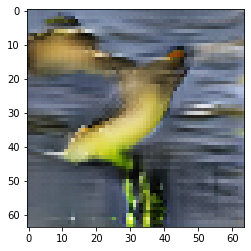

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 6

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.973002672195435 sec
Gen loss: 10.920857791332049, Gen valid loss: 1.532688477498083, Gen attr loss: 4.733878386376027, Gen caption loss: 4.654290931334663, Disc valid loss: 0.975445276838008, Disc valid real loss: 0.5124757554796007, Disc valid fake loss: 0.4629695199046355, Disc attr loss: 8.76959451750365, Disc attr real loss: 4.035716131127623, Disc attr fake loss: 4.733878386376027
Time for epoch 2 is 37.78494906425476 sec
Gen loss: 10.879026089903462, Gen valid loss: 1.5189688073264227, Gen attr loss: 4.708176865487241, Gen caption loss: 4.651880429043033, Disc valid loss: 0.9763211858304859, Disc valid real loss: 0.5098473609786046, Disc valid fake loss: 0.4664738267094785, Disc attr loss: 8.743153990768805, Disc attr real loss: 4.034977125281564, Disc attr fake loss: 4.708176865487241
Time for epoch 3 is 38.06295990943909 sec
Gen loss: 10.881

Time for epoch 21 is 38.031590938568115 sec
Gen loss: 10.922848797102931, Gen valid loss: 1.5326422756603417, Gen attr loss: 4.729233701700764, Gen caption loss: 4.660972803911865, Disc valid loss: 0.9803389494981223, Disc valid real loss: 0.5121445844813091, Disc valid fake loss: 0.46819436533987363, Disc attr loss: 8.753924280001218, Disc attr real loss: 4.024690578300455, Disc attr fake loss: 4.729233701700764
Time for epoch 22 is 38.05221676826477 sec
Gen loss: 10.926226292845357, Gen valid loss: 1.5211923865444938, Gen attr loss: 4.737412061148543, Gen caption loss: 4.667621810907917, Disc valid loss: 0.9705463778681871, Disc valid real loss: 0.5083881860503013, Disc valid fake loss: 0.4621581908487046, Disc attr loss: 8.763251624456267, Disc attr real loss: 4.0258395633077235, Disc attr fake loss: 4.737412061148543
Time for epoch 23 is 38.07551193237305 sec
Gen loss: 10.904210648885588, Gen valid loss: 1.5255921778640127, Gen attr loss: 4.710832345776442, Gen caption loss: 4.6677

Time for epoch 41 is 37.859015464782715 sec
Gen loss: 10.924705272767602, Gen valid loss: 1.5399657361875705, Gen attr loss: 4.739926381485895, Gen caption loss: 4.644813168016553, Disc valid loss: 0.9699478449860239, Disc valid real loss: 0.5069452538319074, Disc valid fake loss: 0.4630025902253179, Disc attr loss: 8.758740407664602, Disc attr real loss: 4.018814026178706, Disc attr fake loss: 4.739926381485895
Time for epoch 42 is 38.205824851989746 sec
Gen loss: 10.936356358411835, Gen valid loss: 1.5457606748513737, Gen attr loss: 4.728678241977847, Gen caption loss: 4.661917442228736, Disc valid loss: 0.9593447128608621, Disc valid real loss: 0.4954983740641173, Disc valid fake loss: 0.4638463385544495, Disc attr loss: 8.747933593222765, Disc attr real loss: 4.019255351244919, Disc attr fake loss: 4.728678241977847
Time for epoch 43 is 38.042601346969604 sec
Gen loss: 10.909335159673923, Gen valid loss: 1.523894951272463, Gen attr loss: 4.726957111823849, Gen caption loss: 4.65848

Time for epoch 61 is 37.89022493362427 sec
Gen loss: 10.903006664782682, Gen valid loss: 1.5280141345853728, Gen attr loss: 4.719903751440488, Gen caption loss: 4.655088759373197, Disc valid loss: 0.9799485616890719, Disc valid real loss: 0.5062900610409455, Disc valid fake loss: 0.4736585021826633, Disc attr loss: 8.7340285726356, Disc attr real loss: 4.014124821195112, Disc attr fake loss: 4.719903751440488
Time for epoch 62 is 38.0919930934906 sec
Gen loss: 10.901776551554196, Gen valid loss: 1.5335886627031858, Gen attr loss: 4.731343785598672, Gen caption loss: 4.636844076761386, Disc valid loss: 0.9703943118816469, Disc valid real loss: 0.507119231673114, Disc valid fake loss: 0.4632750819853651, Disc attr loss: 8.741571105269559, Disc attr real loss: 4.010227319670887, Disc attr fake loss: 4.731343785598672
Time for epoch 63 is 37.90790319442749 sec
Gen loss: 10.89160381100042, Gen valid loss: 1.5303427646476724, Gen attr loss: 4.702098484607893, Gen caption loss: 4.659162537515

Time for epoch 81 is 38.03394794464111 sec
Gen loss: 10.914124294994323, Gen valid loss: 1.516031718835598, Gen attr loss: 4.739125018520407, Gen caption loss: 4.658967544069781, Disc valid loss: 0.9826028857450821, Disc valid real loss: 0.5114129445740201, Disc valid fake loss: 0.4711899397980553, Disc attr loss: 8.740760723103676, Disc attr real loss: 4.0016357045832684, Disc attr fake loss: 4.739125018520407
Time for epoch 82 is 38.047253370285034 sec
Gen loss: 10.925384274666225, Gen valid loss: 1.5417452333419304, Gen attr loss: 4.7343531914842805, Gen caption loss: 4.64928581398031, Disc valid loss: 0.9706309991800365, Disc valid real loss: 0.5064618879055912, Disc valid fake loss: 0.46416911014373385, Disc attr loss: 8.735010497292206, Disc attr real loss: 4.000657305807925, Disc attr fake loss: 4.7343531914842805
Time for epoch 83 is 38.090359926223755 sec
Gen loss: 10.898420411396803, Gen valid loss: 1.5135326899164092, Gen attr loss: 4.731272213504243, Gen caption loss: 4.653

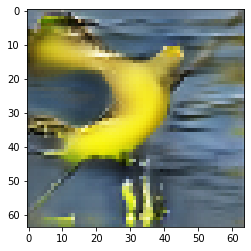

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 7

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.02595090866089 sec
Gen loss: 10.919127327316822, Gen valid loss: 1.5446625930183948, Gen attr loss: 4.719580236812271, Gen caption loss: 4.654884476002639, Disc valid loss: 0.9689608400430136, Disc valid real loss: 0.5072137673049761, Disc valid fake loss: 0.46174707435333956, Disc attr loss: 8.71805325756228, Disc attr real loss: 3.9984730207500094, Disc attr fake loss: 4.719580236812271
Time for epoch 2 is 38.07858848571777 sec
Gen loss: 10.914112362435194, Gen valid loss: 1.52490229593706, Gen attr loss: 4.724047230511177, Gen caption loss: 4.665162868292997, Disc valid loss: 0.9731569522764625, Disc valid real loss: 0.5069182118587701, Disc valid fake loss: 0.4662387402561622, Disc attr loss: 8.720548966389684, Disc attr real loss: 3.9965017358785078, Disc attr fake loss: 4.724047230511177
Time for epoch 3 is 38.0479896068573 sec
Gen loss: 10.89

Time for epoch 21 is 38.08361601829529 sec
Gen loss: 10.91993694124506, Gen valid loss: 1.529454964609327, Gen attr loss: 4.730869593659068, Gen caption loss: 4.659612371992613, Disc valid loss: 0.9836532832161198, Disc valid real loss: 0.515852983889541, Disc valid fake loss: 0.46780029868045797, Disc attr loss: 8.722033589836059, Disc attr real loss: 3.991163996176991, Disc attr fake loss: 4.730869593659068
Time for epoch 22 is 37.681676387786865 sec
Gen loss: 10.826785692354528, Gen valid loss: 1.5215153364631218, Gen attr loss: 4.680539006463234, Gen caption loss: 4.6247313481359305, Disc valid loss: 0.9772364841244086, Disc valid real loss: 0.5095791103555581, Disc valid fake loss: 0.4676573727996692, Disc attr loss: 8.669740495966057, Disc attr real loss: 3.9892014895028214, Disc attr fake loss: 4.680539006463234
Time for epoch 23 is 38.148982524871826 sec
Gen loss: 10.844912092214031, Gen valid loss: 1.5236943265609948, Gen attr loss: 4.698957357303237, Gen caption loss: 4.62226

Time for epoch 41 is 38.04460406303406 sec
Gen loss: 10.878074989732365, Gen valid loss: 1.5453367732404693, Gen attr loss: 4.701958358449342, Gen caption loss: 4.630779845281668, Disc valid loss: 0.9709605405001136, Disc valid real loss: 0.5058619316192824, Disc valid fake loss: 0.4650986089615964, Disc attr loss: 8.686450898808838, Disc attr real loss: 3.984492540359497, Disc attr fake loss: 4.701958358449342
Time for epoch 42 is 38.04371452331543 sec
Gen loss: 10.888046799636468, Gen valid loss: 1.5108280330492552, Gen attr loss: 4.719942702187432, Gen caption loss: 4.657276068922627, Disc valid loss: 0.9882073802999688, Disc valid real loss: 0.5134811880304239, Disc valid fake loss: 0.47472619097730334, Disc attr loss: 8.70180755126767, Disc attr real loss: 3.9818648490802384, Disc attr fake loss: 4.719942702187432
Time for epoch 43 is 37.996641635894775 sec
Gen loss: 10.874542921216184, Gen valid loss: 1.521863965484185, Gen attr loss: 4.712127911689159, Gen caption loss: 4.640551

Time for epoch 61 is 37.9282386302948 sec
Gen loss: 10.914146265686366, Gen valid loss: 1.5295582473439575, Gen attr loss: 4.726999631096031, Gen caption loss: 4.657588402430217, Disc valid loss: 0.9834874165736562, Disc valid real loss: 0.511240375316563, Disc valid fake loss: 0.4722470416609188, Disc attr loss: 8.706435712695445, Disc attr real loss: 3.9794360815994136, Disc attr fake loss: 4.726999631096031
Time for epoch 62 is 37.93762993812561 sec
Gen loss: 10.893220056363237, Gen valid loss: 1.5342769848945017, Gen attr loss: 4.712095908033169, Gen caption loss: 4.6468471789424655, Disc valid loss: 0.972593162279465, Disc valid real loss: 0.5041863503979473, Disc valid fake loss: 0.46840681155845726, Disc attr loss: 8.693806362022876, Disc attr real loss: 3.981710453989706, Disc attr fake loss: 4.712095908033169
Time for epoch 63 is 37.937723875045776 sec
Gen loss: 10.924947596500882, Gen valid loss: 1.527396624327352, Gen attr loss: 4.727655212407512, Gen caption loss: 4.6698957

Time for epoch 81 is 37.97103214263916 sec
Gen loss: 10.915252564076162, Gen valid loss: 1.5425463242905573, Gen attr loss: 4.724631023277758, Gen caption loss: 4.648075186463229, Disc valid loss: 0.9842678195415797, Disc valid real loss: 0.5145774534966564, Disc valid fake loss: 0.46969036600454067, Disc attr loss: 8.694738638110277, Disc attr real loss: 3.9701076148325187, Disc attr fake loss: 4.724631023277758
Time for epoch 82 is 37.92775917053223 sec
Gen loss: 10.902135763711076, Gen valid loss: 1.5294483363789917, Gen attr loss: 4.71759454861566, Gen caption loss: 4.655092878393364, Disc valid loss: 0.9710500947828216, Disc valid real loss: 0.5023744195941987, Disc valid fake loss: 0.4686756752693879, Disc attr loss: 8.694257617965947, Disc attr real loss: 3.9766630693502867, Disc attr fake loss: 4.71759454861566
Time for epoch 83 is 37.93669772148132 sec
Gen loss: 10.887382375515573, Gen valid loss: 1.5177203946643405, Gen attr loss: 4.723513130250016, Gen caption loss: 4.646148

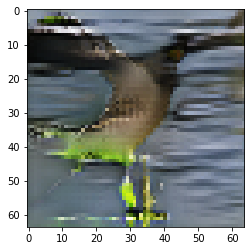

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 8

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.97680878639221 sec
Gen loss: 10.869427696476137, Gen valid loss: 1.5049112718602828, Gen attr loss: 4.711646512271912, Gen caption loss: 4.6528698454704385, Disc valid loss: 0.9885801338567967, Disc valid real loss: 0.5150802833278004, Disc valid fake loss: 0.47349985117511695, Disc attr loss: 8.68178282326799, Disc attr real loss: 3.9701363109960788, Disc attr fake loss: 4.711646512271912
Time for epoch 2 is 37.761831283569336 sec
Gen loss: 10.887121908709933, Gen valid loss: 1.5186677890095284, Gen attr loss: 4.71693993325479, Gen caption loss: 4.651514195491305, Disc valid loss: 0.9674099247630049, Disc valid real loss: 0.500630201362982, Disc valid fake loss: 0.46677972364231823, Disc attr loss: 8.684500920417186, Disc attr real loss: 3.967560987162396, Disc attr fake loss: 4.71693993325479
Time for epoch 3 is 37.957252740859985 sec
Gen loss: 10

Time for epoch 21 is 37.82880473136902 sec
Gen loss: 10.903991789675663, Gen valid loss: 1.5157533153931946, Gen attr loss: 4.729472145478577, Gen caption loss: 4.658766325250228, Disc valid loss: 0.9794296854879798, Disc valid real loss: 0.5122320213453556, Disc valid fake loss: 0.4671976661617517, Disc attr loss: 8.690167236457349, Disc attr real loss: 3.9606950909787724, Disc attr fake loss: 4.729472145478577
Time for epoch 22 is 37.86166477203369 sec
Gen loss: 10.959026931101068, Gen valid loss: 1.5297994442425447, Gen attr loss: 4.73935654299046, Gen caption loss: 4.689870944837245, Disc valid loss: 0.9716780054859999, Disc valid real loss: 0.5024326677890975, Disc valid fake loss: 0.4692453386660837, Disc attr loss: 8.699556518699419, Disc attr real loss: 3.9601999757089588, Disc attr fake loss: 4.73935654299046
Time for epoch 23 is 37.825931549072266 sec
Gen loss: 10.875703809061024, Gen valid loss: 1.5167905121314815, Gen attr loss: 4.715118502536764, Gen caption loss: 4.643794

Time for epoch 41 is 37.86352515220642 sec
Gen loss: 10.848485295365496, Gen valid loss: 1.5372363839369156, Gen attr loss: 4.685410002705851, Gen caption loss: 4.625838915506999, Disc valid loss: 0.9786893702780974, Disc valid real loss: 0.5104640895112097, Disc valid fake loss: 0.46822527850546486, Disc attr loss: 8.63716633726911, Disc attr real loss: 3.951756334563258, Disc attr fake loss: 4.685410002705851
Time for epoch 42 is 37.84753727912903 sec
Gen loss: 10.862131379807222, Gen valid loss: 1.5304082173319045, Gen attr loss: 4.702835179925934, Gen caption loss: 4.628888015824605, Disc valid loss: 0.9781020248162391, Disc valid real loss: 0.5079410261901091, Disc valid fake loss: 0.47016099814153944, Disc attr loss: 8.658549978804135, Disc attr real loss: 3.9557147988782018, Disc attr fake loss: 4.702835179925934
Time for epoch 43 is 37.835633993148804 sec
Gen loss: 10.864278702878048, Gen valid loss: 1.526241962179582, Gen attr loss: 4.70110274136551, Gen caption loss: 4.636934

Time for epoch 61 is 37.812530279159546 sec
Gen loss: 10.876129556154494, Gen valid loss: 1.5361161028466574, Gen attr loss: 4.708165065382877, Gen caption loss: 4.6318483901863825, Disc valid loss: 0.975891732588047, Disc valid real loss: 0.5090648880011344, Disc valid fake loss: 0.46682684547532866, Disc attr loss: 8.657249357642197, Disc attr real loss: 3.94908429225932, Disc attr fake loss: 4.708165065382877
Time for epoch 62 is 37.74710655212402 sec
Gen loss: 10.816055465842974, Gen valid loss: 1.505147181552277, Gen attr loss: 4.684760358598497, Gen caption loss: 4.626147929891984, Disc valid loss: 0.9773297965688111, Disc valid real loss: 0.5084957524043757, Disc valid fake loss: 0.46883404626432795, Disc attr loss: 8.633260298550613, Disc attr real loss: 3.9484999399521166, Disc attr fake loss: 4.684760358598497
Time for epoch 63 is 37.942084074020386 sec
Gen loss: 10.91120683210006, Gen valid loss: 1.5222447480612653, Gen attr loss: 4.724440350442075, Gen caption loss: 4.66452

Time for epoch 81 is 37.71840476989746 sec
Gen loss: 10.85079629634454, Gen valid loss: 1.5330358336611491, Gen attr loss: 4.682047478874847, Gen caption loss: 4.635712970563067, Disc valid loss: 0.9714427884355147, Disc valid real loss: 0.5025057393683974, Disc valid fake loss: 0.46893704987476836, Disc attr loss: 8.624486777840591, Disc attr real loss: 3.9424392989657435, Disc attr fake loss: 4.682047478874847
Time for epoch 82 is 37.7696852684021 sec
Gen loss: 10.915736118306313, Gen valid loss: 1.5352056517510557, Gen attr loss: 4.723900119140542, Gen caption loss: 4.656630352583681, Disc valid loss: 0.9738196879221495, Disc valid real loss: 0.5056052657808392, Disc valid fake loss: 0.468214422706666, Disc attr loss: 8.666796242318503, Disc attr real loss: 3.94289612317796, Disc attr fake loss: 4.723900119140542
Time for epoch 83 is 37.757972240448 sec
Gen loss: 10.91591358701711, Gen valid loss: 1.5404908140177327, Gen attr loss: 4.712910413095945, Gen caption loss: 4.662512374764

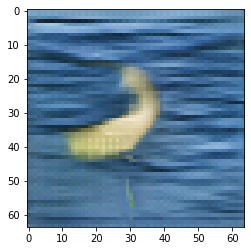

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 9

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.714736461639404 sec
Gen loss: 10.911574260329166, Gen valid loss: 1.5244526669261902, Gen attr loss: 4.726961564888476, Gen caption loss: 4.660160023991654, Disc valid loss: 0.9831083074494752, Disc valid real loss: 0.5117724202674255, Disc valid fake loss: 0.47133588863582143, Disc attr loss: 8.661279320393797, Disc attr real loss: 3.9343177555053215, Disc attr fake loss: 4.726961564888476
Time for epoch 2 is 37.72083497047424 sec
Gen loss: 10.868772364567288, Gen valid loss: 1.5226042545261744, Gen attr loss: 4.704170108810673, Gen caption loss: 4.641997991215569, Disc valid loss: 0.9723315213107804, Disc valid real loss: 0.5033433542342044, Disc valid fake loss: 0.46898816731887133, Disc attr loss: 8.639265108883865, Disc attr real loss: 3.9350950000731926, Disc attr fake loss: 4.704170108810673
Time for epoch 3 is 37.70193004608154 sec
Gen loss:

Time for epoch 21 is 37.91612219810486 sec
Gen loss: 10.92349900398151, Gen valid loss: 1.5230235365348133, Gen attr loss: 4.719885039781813, Gen caption loss: 4.680590422818978, Disc valid loss: 0.9807823138831431, Disc valid real loss: 0.5111485063868163, Disc valid fake loss: 0.46963380781938713, Disc attr loss: 8.650739125119962, Disc attr real loss: 3.930854085338148, Disc attr fake loss: 4.719885039781813
Time for epoch 22 is 37.60627889633179 sec
Gen loss: 10.880530742448842, Gen valid loss: 1.5314813818388837, Gen attr loss: 4.70576919255864, Gen caption loss: 4.643280133968446, Disc valid loss: 0.9713709553082784, Disc valid real loss: 0.5050566765835615, Disc valid fake loss: 0.46631428017848875, Disc attr loss: 8.638117024569008, Disc attr real loss: 3.9323478320103673, Disc attr fake loss: 4.70576919255864
Time for epoch 23 is 37.896037340164185 sec
Gen loss: 10.890630442921708, Gen valid loss: 1.5412151202922915, Gen attr loss: 4.71118815352277, Gen caption loss: 4.6382271

Time for epoch 41 is 37.73238706588745 sec
Gen loss: 10.863818980167874, Gen valid loss: 1.5179812300819044, Gen attr loss: 4.699959234816595, Gen caption loss: 4.645878488778422, Disc valid loss: 0.9844924028972947, Disc valid real loss: 0.508803766109756, Disc valid fake loss: 0.4756886361414178, Disc attr loss: 8.622816702860804, Disc attr real loss: 3.9228574680442088, Disc attr fake loss: 4.699959234816595
Time for epoch 42 is 37.697426557540894 sec
Gen loss: 10.87348756816006, Gen valid loss: 1.5138847908676478, Gen attr loss: 4.707781110675677, Gen caption loss: 4.651821644325566, Disc valid loss: 0.976851894441982, Disc valid real loss: 0.511769703248652, Disc valid fake loss: 0.46508219062797423, Disc attr loss: 8.629551473994889, Disc attr real loss: 3.9217703633192107, Disc attr fake loss: 4.707781110675677
Time for epoch 43 is 37.764100313186646 sec
Gen loss: 10.853253225000893, Gen valid loss: 1.514233256420146, Gen attr loss: 4.695269866364435, Gen caption loss: 4.6437501

Time for epoch 61 is 37.79283046722412 sec
Gen loss: 10.837422027174373, Gen valid loss: 1.500446087622707, Gen attr loss: 4.697342462979035, Gen caption loss: 4.639633446851074, Disc valid loss: 0.9867327996708837, Disc valid real loss: 0.5125698277620765, Disc valid fake loss: 0.4741629729587534, Disc attr loss: 8.611691111148534, Disc attr real loss: 3.9143486481694993, Disc attr fake loss: 4.697342462979035
Time for epoch 62 is 37.811508655548096 sec
Gen loss: 10.918435791966715, Gen valid loss: 1.5249156777451678, Gen attr loss: 4.7303513899082095, Gen caption loss: 4.663168712037042, Disc valid loss: 0.9739735670852144, Disc valid real loss: 0.5076828124077339, Disc valid fake loss: 0.46629075483901067, Disc attr loss: 8.649709751289388, Disc attr real loss: 3.919358361381179, Disc attr fake loss: 4.7303513899082095
Time for epoch 63 is 37.76058650016785 sec
Gen loss: 10.881440204010424, Gen valid loss: 1.5189871074061407, Gen attr loss: 4.714547753657106, Gen caption loss: 4.647

Time for epoch 81 is 37.72838497161865 sec
Gen loss: 10.820211730998382, Gen valid loss: 1.5111621728111413, Gen attr loss: 4.686559896158978, Gen caption loss: 4.622489650075028, Disc valid loss: 0.9849667841502967, Disc valid real loss: 0.5141492590994693, Disc valid fake loss: 0.47081752262787446, Disc attr loss: 8.596236390473074, Disc attr real loss: 3.9096764943140956, Disc attr fake loss: 4.686559896158978
Time for epoch 82 is 37.618529081344604 sec
Gen loss: 10.864060675871727, Gen valid loss: 1.5110137000639587, Gen attr loss: 4.701279187913187, Gen caption loss: 4.651767764311173, Disc valid loss: 0.9806713474798332, Disc valid real loss: 0.5064362974024723, Disc valid fake loss: 0.4742350488658843, Disc attr loss: 8.609608297425558, Disc attr real loss: 3.9083291095123704, Disc attr fake loss: 4.701279187913187
Time for epoch 83 is 37.4023711681366 sec
Gen loss: 10.841771156807257, Gen valid loss: 1.5099770450979713, Gen attr loss: 4.694304861027374, Gen caption loss: 4.6374

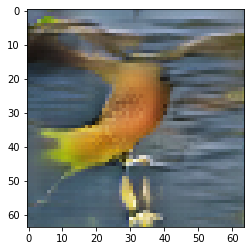

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 10

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.13789391517639 sec
Gen loss: 10.864660958287516, Gen valid loss: 1.513846463304225, Gen attr loss: 4.715440330143544, Gen caption loss: 4.635374187453976, Disc valid loss: 0.9828074643928507, Disc valid real loss: 0.5098402874902658, Disc valid fake loss: 0.47296717520651776, Disc attr loss: 8.618137773136459, Disc attr real loss: 3.902697442992916, Disc attr fake loss: 4.715440330143544
Time for epoch 2 is 37.31788372993469 sec
Gen loss: 10.856678275234977, Gen valid loss: 1.5064333858205696, Gen attr loss: 4.710823163753602, Gen caption loss: 4.639421705307999, Disc valid loss: 0.9833601315816244, Disc valid real loss: 0.5121282760689898, Disc valid fake loss: 0.4712318557549298, Disc attr loss: 8.61367024251116, Disc attr real loss: 3.9028470787575573, Disc attr fake loss: 4.710823163753602
Time for epoch 3 is 37.4984495639801 sec
Gen loss: 10.8

Time for epoch 21 is 37.321314573287964 sec
Gen loss: 10.890625480713883, Gen valid loss: 1.5354549526199093, Gen attr loss: 4.70472205363638, Gen caption loss: 4.650448485118587, Disc valid loss: 0.9824390944426622, Disc valid real loss: 0.5083760846921099, Disc valid fake loss: 0.4740630099120825, Disc attr loss: 8.60195472763806, Disc attr real loss: 3.8972326740016783, Disc attr fake loss: 4.70472205363638
Time for epoch 22 is 37.34385275840759 sec
Gen loss: 10.83798478806245, Gen valid loss: 1.505117553682508, Gen attr loss: 4.696792128286387, Gen caption loss: 4.636075109647218, Disc valid loss: 0.9841663994117158, Disc valid real loss: 0.5128582552035004, Disc valid fake loss: 0.47130814622734296, Disc attr loss: 8.589830428281127, Disc attr real loss: 3.89303829999474, Disc attr fake loss: 4.696792128286387
Time for epoch 23 is 37.39445757865906 sec
Gen loss: 10.858199716583501, Gen valid loss: 1.5190270887157782, Gen attr loss: 4.695835582609099, Gen caption loss: 4.6433370526

Time for epoch 41 is 37.26912450790405 sec
Gen loss: 10.889352271227333, Gen valid loss: 1.5231735683715117, Gen attr loss: 4.712314296221022, Gen caption loss: 4.653864419880275, Disc valid loss: 0.9806363876596053, Disc valid real loss: 0.5079946479984738, Disc valid fake loss: 0.4726417373997086, Disc attr loss: 8.598246173806952, Disc attr real loss: 3.8859318775859304, Disc attr fake loss: 4.712314296221022
Time for epoch 42 is 37.72488212585449 sec
Gen loss: 10.858515664490904, Gen valid loss: 1.5057151634195634, Gen attr loss: 4.712193907114871, Gen caption loss: 4.640606601063798, Disc valid loss: 0.9859360588921441, Disc valid real loss: 0.5121630496448941, Disc valid fake loss: 0.47377300997413596, Disc attr loss: 8.598796279772833, Disc attr real loss: 3.886602372657962, Disc attr fake loss: 4.712193907114871
Time for epoch 43 is 37.44016456604004 sec
Gen loss: 10.823854268081789, Gen valid loss: 1.5154636229279888, Gen attr loss: 4.685619004050568, Gen caption loss: 4.62277

Time for epoch 61 is 37.617974519729614 sec
Gen loss: 10.835099233198296, Gen valid loss: 1.503097404632465, Gen attr loss: 4.691705644292237, Gen caption loss: 4.6402962013957945, Disc valid loss: 0.9920085786480891, Disc valid real loss: 0.5161758263905843, Disc valid fake loss: 0.47583275411510206, Disc attr loss: 8.569729769456032, Disc attr real loss: 3.8780241251637944, Disc attr fake loss: 4.691705644292237
Time for epoch 62 is 37.43263602256775 sec
Gen loss: 10.844045750170865, Gen valid loss: 1.4975261500857386, Gen attr loss: 4.704685801736061, Gen caption loss: 4.641833811271481, Disc valid loss: 0.9869038947229463, Disc valid real loss: 0.5159805308835617, Disc valid fake loss: 0.4709233634355592, Disc attr loss: 8.581376542889975, Disc attr real loss: 3.8766907411539133, Disc attr fake loss: 4.704685801736061
Time for epoch 63 is 37.40841841697693 sec
Gen loss: 10.897992710434002, Gen valid loss: 1.511345495699544, Gen attr loss: 4.727234374539962, Gen caption loss: 4.6594

Time for epoch 81 is 37.561713218688965 sec
Gen loss: 10.880696725716113, Gen valid loss: 1.5213095440774107, Gen attr loss: 4.706645486800651, Gen caption loss: 4.652741682238695, Disc valid loss: 0.9851820386522184, Disc valid real loss: 0.5095067064613508, Disc valid fake loss: 0.4756753328369885, Disc attr loss: 8.577217543997415, Disc attr real loss: 3.8705720571967643, Disc attr fake loss: 4.706645486800651
Time for epoch 82 is 37.525530099868774 sec
Gen loss: 10.84475901327159, Gen valid loss: 1.51949468634639, Gen attr loss: 4.68940834301274, Gen caption loss: 4.635855982943279, Disc valid loss: 0.9834635189878262, Disc valid real loss: 0.5082400385441819, Disc valid fake loss: 0.47522348052440944, Disc attr loss: 8.561260281539544, Disc attr real loss: 3.8718519385268046, Disc attr fake loss: 4.68940834301274
Time for epoch 83 is 37.58101224899292 sec
Gen loss: 10.912006851134262, Gen valid loss: 1.5128072073789147, Gen attr loss: 4.7309892591099105, Gen caption loss: 4.668210

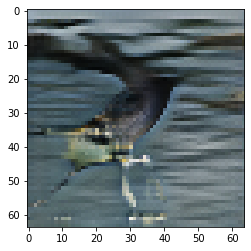

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 11

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.64744782447815 sec
Gen loss: 10.885846220703952, Gen valid loss: 1.4991379100778885, Gen attr loss: 4.716740123624724, Gen caption loss: 4.669968181832373, Disc valid loss: 0.9908915399535885, Disc valid real loss: 0.5144346328124121, Disc valid fake loss: 0.47645690754500186, Disc attr loss: 8.580646875427991, Disc attr real loss: 3.8639067518032664, Disc attr fake loss: 4.716740123624724
Time for epoch 2 is 37.62230467796326 sec
Gen loss: 10.882881986416452, Gen valid loss: 1.5124301626107235, Gen attr loss: 4.725145261785202, Gen caption loss: 4.645306552974835, Disc valid loss: 0.978504104342887, Disc valid real loss: 0.5105309567961912, Disc valid fake loss: 0.4679731468198099, Disc attr loss: 8.583318285179654, Disc attr real loss: 3.858173023394453, Disc attr fake loss: 4.725145261785202
Time for epoch 3 is 37.538036584854126 sec
Gen loss: 1

Time for epoch 21 is 37.59253001213074 sec
Gen loss: 10.813344921846054, Gen valid loss: 1.5023488193992678, Gen attr loss: 4.675555575507766, Gen caption loss: 4.63544049560216, Disc valid loss: 0.9892246886320554, Disc valid real loss: 0.5097524902523372, Disc valid fake loss: 0.47947220096420146, Disc attr loss: 8.531196939266794, Disc attr real loss: 3.855641363759028, Disc attr fake loss: 4.675555575507766
Time for epoch 22 is 37.64836311340332 sec
Gen loss: 10.86880485669061, Gen valid loss: 1.5045228976867386, Gen attr loss: 4.700773593856067, Gen caption loss: 4.6635083829161275, Disc valid loss: 0.9851271653886087, Disc valid real loss: 0.5112966404859289, Disc valid fake loss: 0.4738305224797267, Disc attr loss: 8.553746853417497, Disc attr real loss: 3.85297325956143, Disc attr fake loss: 4.700773593856067
Time for epoch 23 is 37.60026168823242 sec
Gen loss: 10.903110250871032, Gen valid loss: 1.5094754191918103, Gen attr loss: 4.730691253977416, Gen caption loss: 4.66294355

Time for epoch 41 is 37.64946889877319 sec
Gen loss: 10.816849631022631, Gen valid loss: 1.5112162789678185, Gen attr loss: 4.686589290133013, Gen caption loss: 4.619044099073746, Disc valid loss: 0.9865413363063885, Disc valid real loss: 0.5113912304727043, Disc valid fake loss: 0.4751501060759795, Disc attr loss: 8.531396058193714, Disc attr real loss: 3.8448067680606997, Disc attr fake loss: 4.686589290133013
Time for epoch 42 is 37.63442063331604 sec
Gen loss: 10.833781777358636, Gen valid loss: 1.5077048187979514, Gen attr loss: 4.681809809795886, Gen caption loss: 4.644267168148423, Disc valid loss: 0.9825088457686468, Disc valid real loss: 0.5085948349499121, Disc valid fake loss: 0.47391401138409045, Disc attr loss: 8.525213653802226, Disc attr real loss: 3.8434038440063394, Disc attr fake loss: 4.681809809795886
Time for epoch 43 is 37.599799156188965 sec
Gen loss: 10.902646385234222, Gen valid loss: 1.5108763929305038, Gen attr loss: 4.727257006213594, Gen caption loss: 4.664

Time for epoch 61 is 37.580795764923096 sec
Gen loss: 10.82319401014788, Gen valid loss: 1.5116940956451705, Gen attr loss: 4.6812088050170315, Gen caption loss: 4.630291068457006, Disc valid loss: 0.9845561738905868, Disc valid real loss: 0.5100688305166032, Disc valid fake loss: 0.4744873419202117, Disc attr loss: 8.524457236938684, Disc attr real loss: 3.8432484319216513, Disc attr fake loss: 4.6812088050170315
Time for epoch 62 is 37.55279326438904 sec
Gen loss: 10.854038916952241, Gen valid loss: 1.512159684163122, Gen attr loss: 4.701256784320201, Gen caption loss: 4.6406224471766775, Disc valid loss: 0.9792617454438352, Disc valid real loss: 0.5109889727782427, Disc valid fake loss: 0.46827277484625013, Disc attr loss: 8.543346299065483, Disc attr real loss: 3.8420895147452834, Disc attr fake loss: 4.701256784320201
Time for epoch 63 is 37.61636304855347 sec
Gen loss: 10.865354602575948, Gen valid loss: 1.5047152065003144, Gen attr loss: 4.714876947687247, Gen caption loss: 4.64

Time for epoch 81 is 37.73354959487915 sec
Gen loss: 10.870095405475235, Gen valid loss: 1.4947612311458847, Gen attr loss: 4.715043898843492, Gen caption loss: 4.660290298746207, Disc valid loss: 0.9923907203402945, Disc valid real loss: 0.5138708235125554, Disc valid fake loss: 0.4785198968277391, Disc attr loss: 8.551438104815599, Disc attr real loss: 3.836394205972108, Disc attr fake loss: 4.715043898843492
Time for epoch 82 is 37.65789723396301 sec
Gen loss: 10.837173609229607, Gen valid loss: 1.5045744410052209, Gen attr loss: 4.701609327864195, Gen caption loss: 4.63098983066838, Disc valid loss: 0.9883238984963435, Disc valid real loss: 0.512403803304605, Disc valid fake loss: 0.4759200962416848, Disc attr loss: 8.539493507809109, Disc attr real loss: 3.8378841799449144, Disc attr fake loss: 4.701609327864195
Time for epoch 83 is 37.562206745147705 sec
Gen loss: 10.828735532476326, Gen valid loss: 1.4935102149399961, Gen attr loss: 4.69714031826836, Gen caption loss: 4.63808501

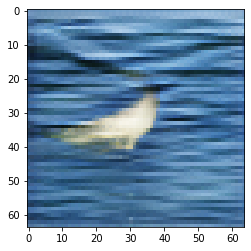

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 12

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.67971968650818 sec
Gen loss: 10.798442237099335, Gen valid loss: 1.5049494718148457, Gen attr loss: 4.669281438114197, Gen caption loss: 4.62421135721491, Disc valid loss: 0.9912408926299594, Disc valid real loss: 0.5126163984540355, Disc valid fake loss: 0.4786244943374541, Disc attr loss: 8.50254332534666, Disc attr real loss: 3.8332618872324624, Disc attr fake loss: 4.669281438114197
Time for epoch 2 is 37.74401330947876 sec
Gen loss: 10.890822653524921, Gen valid loss: 1.5231291873022146, Gen attr loss: 4.718204964790241, Gen caption loss: 4.649488444573834, Disc valid loss: 0.9777289553063349, Disc valid real loss: 0.506206575528716, Disc valid fake loss: 0.47152237735466584, Disc attr loss: 8.548610310567426, Disc attr real loss: 3.830405345777186, Disc attr fake loss: 4.718204964790241
Time for epoch 3 is 37.66526675224304 sec
Gen loss: 10.8

Time for epoch 21 is 37.72858691215515 sec
Gen loss: 10.856740662075962, Gen valid loss: 1.4999028709199693, Gen attr loss: 4.720533847808838, Gen caption loss: 4.6363039307478, Disc valid loss: 0.9911252783565987, Disc valid real loss: 0.514697169950661, Disc valid fake loss: 0.4764281050945685, Disc attr loss: 8.54108024677287, Disc attr real loss: 3.820546398964032, Disc attr fake loss: 4.720533847808838
Time for epoch 22 is 37.75714826583862 sec
Gen loss: 10.808363028011994, Gen valid loss: 1.5086721773070049, Gen attr loss: 4.689582119143106, Gen caption loss: 4.610108701840326, Disc valid loss: 0.9803226207329975, Disc valid real loss: 0.50609810718999, Disc valid fake loss: 0.4742245141083632, Disc attr loss: 8.507629926934797, Disc attr real loss: 3.8180478077916917, Disc attr fake loss: 4.689582119143106
Time for epoch 23 is 37.559454679489136 sec
Gen loss: 10.86303289149835, Gen valid loss: 1.5079333804810273, Gen attr loss: 4.709502179448197, Gen caption loss: 4.645597333184

Time for epoch 41 is 37.99164938926697 sec
Gen loss: 10.831293948620639, Gen valid loss: 1.514039057703199, Gen attr loss: 4.6876420716283125, Gen caption loss: 4.629612809597315, Disc valid loss: 0.9887244775689391, Disc valid real loss: 0.5125261721249196, Disc valid fake loss: 0.4761983061709055, Disc attr loss: 8.501832629930036, Disc attr real loss: 3.814190558301724, Disc attr fake loss: 4.6876420716283125
Time for epoch 42 is 38.07292890548706 sec
Gen loss: 10.858844943162872, Gen valid loss: 1.502027520642371, Gen attr loss: 4.715224167195762, Gen caption loss: 4.641593281815692, Disc valid loss: 0.9862384085409687, Disc valid real loss: 0.513179688676586, Disc valid fake loss: 0.47305872099509405, Disc attr loss: 8.531483305179007, Disc attr real loss: 3.8162591379832445, Disc attr fake loss: 4.715224167195762
Time for epoch 43 is 38.19398832321167 sec
Gen loss: 10.838990033157472, Gen valid loss: 1.5041389549327737, Gen attr loss: 4.699349541651201, Gen caption loss: 4.635501

Time for epoch 61 is 38.18728947639465 sec
Gen loss: 10.842492403376717, Gen valid loss: 1.497092200488579, Gen attr loss: 4.69965786533304, Gen caption loss: 4.645742309125781, Disc valid loss: 0.9934464788372278, Disc valid real loss: 0.5142631227892589, Disc valid fake loss: 0.4791833583901568, Disc attr loss: 8.503204996346781, Disc attr real loss: 3.803547131013741, Disc attr fake loss: 4.69965786533304
Time for epoch 62 is 38.225372314453125 sec
Gen loss: 10.825448666807759, Gen valid loss: 1.4984759773988388, Gen attr loss: 4.695683768771205, Gen caption loss: 4.631288949067031, Disc valid loss: 0.9863241287427866, Disc valid real loss: 0.5074061429112907, Disc valid fake loss: 0.4789179840546636, Disc attr loss: 8.498988941756044, Disc attr real loss: 3.8033051729848393, Disc attr fake loss: 4.695683768771205
Time for epoch 63 is 38.20571732521057 sec
Gen loss: 10.822399594273348, Gen valid loss: 1.511440622774243, Gen attr loss: 4.686029779232614, Gen caption loss: 4.624929208

Time for epoch 81 is 38.271719455718994 sec
Gen loss: 10.826498695828404, Gen valid loss: 1.4935673581875437, Gen attr loss: 4.700548526717395, Gen caption loss: 4.632382808338982, Disc valid loss: 0.9977082800735949, Disc valid real loss: 0.5194935948868108, Disc valid fake loss: 0.4782146848637237, Disc attr loss: 8.498336779715892, Disc attr real loss: 3.797788252998497, Disc attr fake loss: 4.700548526717395
Time for epoch 82 is 38.17096304893494 sec
Gen loss: 10.802410839049797, Gen valid loss: 1.4953953851529254, Gen attr loss: 4.681883887546818, Gen caption loss: 4.625131566350053, Disc valid loss: 0.9845984229227391, Disc valid real loss: 0.5127771684147802, Disc valid fake loss: 0.47182125507331474, Disc attr loss: 8.481831261782142, Disc attr real loss: 3.7999473742353236, Disc attr fake loss: 4.681883887546818
Time for epoch 83 is 38.433363914489746 sec
Gen loss: 10.826741471846253, Gen valid loss: 1.5062373437209504, Gen attr loss: 4.688714378894506, Gen caption loss: 4.631

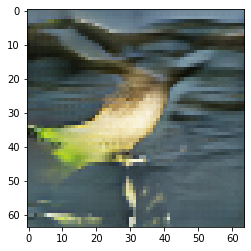

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 13

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.86224389076233 sec
Gen loss: 10.849517543141435, Gen valid loss: 1.5007973870610802, Gen attr loss: 4.702109372389672, Gen caption loss: 4.646610774968051, Disc valid loss: 0.9890706243553782, Disc valid real loss: 0.5112928072934552, Disc valid fake loss: 0.47777781690039284, Disc attr loss: 8.494035665904926, Disc attr real loss: 3.7919262935152545, Disc attr fake loss: 4.702109372389672
Time for epoch 2 is 37.840460777282715 sec
Gen loss: 10.842713692000888, Gen valid loss: 1.4895973919529901, Gen attr loss: 4.7043171684916425, Gen caption loss: 4.648799129294832, Disc valid loss: 0.9905919560248936, Disc valid real loss: 0.5118081053582634, Disc valid fake loss: 0.47878385147428126, Disc attr loss: 8.497133581942013, Disc attr real loss: 3.79281641345037, Disc attr fake loss: 4.7043171684916425
Time for epoch 3 is 37.930410623550415 sec
Gen los

Time for epoch 21 is 38.21032214164734 sec
Gen loss: 10.80824577776074, Gen valid loss: 1.4807182563352714, Gen attr loss: 4.68728299321844, Gen caption loss: 4.6402445537288015, Disc valid loss: 1.0040573991411101, Disc valid real loss: 0.5234125315496915, Disc valid fake loss: 0.48064486783371385, Disc attr loss: 8.470258146120603, Disc attr real loss: 3.782975152902164, Disc attr fake loss: 4.68728299321844
Time for epoch 22 is 37.81949830055237 sec
Gen loss: 10.831598258600003, Gen valid loss: 1.5026538932549598, Gen attr loss: 4.694646574294341, Gen caption loss: 4.634297805103829, Disc valid loss: 0.9834666925717176, Disc valid real loss: 0.508588759233635, Disc valid fake loss: 0.4748779324496665, Disc attr loss: 8.47870958723673, Disc attr real loss: 3.784063012942389, Disc attr fake loss: 4.694646574294341
Time for epoch 23 is 38.16611123085022 sec
Gen loss: 10.857263526296228, Gen valid loss: 1.5126110531773347, Gen attr loss: 4.704655001803142, Gen caption loss: 4.6399974965

Time for epoch 41 is 38.10796642303467 sec
Gen loss: 10.79775844356878, Gen valid loss: 1.4927394390106201, Gen attr loss: 4.674351481564322, Gen caption loss: 4.630667542377462, Disc valid loss: 0.994672406495102, Disc valid real loss: 0.5143925982923688, Disc valid fake loss: 0.4802798098988003, Disc attr loss: 8.457566327195826, Disc attr real loss: 3.783214845631504, Disc attr fake loss: 4.674351481564322
Time for epoch 42 is 38.08310270309448 sec
Gen loss: 10.831596495982431, Gen valid loss: 1.4902126569411942, Gen attr loss: 4.700345216404778, Gen caption loss: 4.641038635558875, Disc valid loss: 0.9876511386093408, Disc valid real loss: 0.5140473310378831, Disc valid fake loss: 0.47360380789451806, Disc attr loss: 8.47770646464857, Disc attr real loss: 3.777361248243792, Disc attr fake loss: 4.700345216404778
Time for epoch 43 is 38.11962080001831 sec
Gen loss: 10.804572469819853, Gen valid loss: 1.4846965950032882, Gen attr loss: 4.689391463752685, Gen caption loss: 4.630484382

Time for epoch 61 is 38.13359260559082 sec
Gen loss: 10.867751160288245, Gen valid loss: 1.4989764612864673, Gen attr loss: 4.707491229866255, Gen caption loss: 4.661283461382072, Disc valid loss: 0.9950374125788205, Disc valid real loss: 0.5108499941302509, Disc valid fake loss: 0.48418741638905954, Disc attr loss: 8.478332976984785, Disc attr real loss: 3.7708417471185287, Disc attr fake loss: 4.707491229866255
Time for epoch 62 is 38.380208253860474 sec
Gen loss: 10.828427017542728, Gen valid loss: 1.4943036222199437, Gen attr loss: 4.691463146752458, Gen caption loss: 4.642660264400286, Disc valid loss: 0.9846185381173441, Disc valid real loss: 0.5102970144613003, Disc valid fake loss: 0.47432152486752044, Disc attr loss: 8.465101961197892, Disc attr real loss: 3.7736388144454334, Disc attr fake loss: 4.691463146752458
Time for epoch 63 is 38.0621383190155 sec
Gen loss: 10.849860775438428, Gen valid loss: 1.504236733364219, Gen attr loss: 4.702950756724288, Gen caption loss: 4.6426

Time for epoch 81 is 38.34369659423828 sec
Gen loss: 10.845543639123601, Gen valid loss: 1.5001025519719937, Gen attr loss: 4.699914282899562, Gen caption loss: 4.645526780668636, Disc valid loss: 0.9905638560693115, Disc valid real loss: 0.5105316705173917, Disc valid fake loss: 0.4800321853096246, Disc attr loss: 8.463660616215652, Disc attr real loss: 3.7637463333160897, Disc attr fake loss: 4.699914282899562
Time for epoch 82 is 38.0570433139801 sec
Gen loss: 10.877563711750476, Gen valid loss: 1.5026539661050813, Gen attr loss: 4.721174039168733, Gen caption loss: 4.653735700984634, Disc valid loss: 0.9861008442514311, Disc valid real loss: 0.5091715562472822, Disc valid fake loss: 0.4769292863888469, Disc attr loss: 8.484401483199784, Disc attr real loss: 3.763227444031051, Disc attr fake loss: 4.721174039168733
Time for epoch 83 is 38.235652685165405 sec
Gen loss: 10.857161576185769, Gen valid loss: 1.5044282445416541, Gen attr loss: 4.697920450996254, Gen caption loss: 4.654812

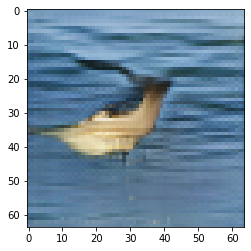

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 14

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 37.862502336502075 sec
Gen loss: 10.848636580676567, Gen valid loss: 1.511919588900517, Gen attr loss: 4.699353282044574, Gen caption loss: 4.637363698101302, Disc valid loss: 0.9875058176394723, Disc valid real loss: 0.5116679467321411, Disc valid fake loss: 0.47583787195727756, Disc attr loss: 8.45556562444382, Disc attr real loss: 3.7562123423992455, Disc attr fake loss: 4.699353282044574
Time for epoch 2 is 37.749683141708374 sec
Gen loss: 10.838820943341346, Gen valid loss: 1.5059367114612403, Gen attr loss: 4.695807432417624, Gen caption loss: 4.637076795262696, Disc valid loss: 0.9813029270185042, Disc valid real loss: 0.509457298168322, Disc valid fake loss: 0.47184562925400775, Disc attr loss: 8.449392761964463, Disc attr real loss: 3.753585329546838, Disc attr fake loss: 4.695807432417624
Time for epoch 3 is 37.77027344703674 sec
Gen loss: 1

Time for epoch 21 is 37.86306405067444 sec
Gen loss: 10.84738845876885, Gen valid loss: 1.5028388070543284, Gen attr loss: 4.705464696496483, Gen caption loss: 4.639084954894978, Disc valid loss: 0.9973757160388357, Disc valid real loss: 0.5173119461633325, Disc valid fake loss: 0.4800637701177985, Disc attr loss: 8.451740333381384, Disc attr real loss: 3.746275636884901, Disc attr fake loss: 4.705464696496483
Time for epoch 22 is 37.927842140197754 sec
Gen loss: 10.792296096884462, Gen valid loss: 1.5017518525524192, Gen attr loss: 4.678204204978012, Gen caption loss: 4.612340058091533, Disc valid loss: 0.9846017063471683, Disc valid real loss: 0.5075258621516913, Disc valid fake loss: 0.47707584508389317, Disc attr loss: 8.423828296868136, Disc attr real loss: 3.7456240918901234, Disc attr fake loss: 4.678204204978012
Time for epoch 23 is 37.70816493034363 sec
Gen loss: 10.836600352755084, Gen valid loss: 1.4842406585610657, Gen attr loss: 4.704305573207576, Gen caption loss: 4.64805

Time for epoch 41 is 37.81240272521973 sec
Gen loss: 10.799675608068947, Gen valid loss: 1.4978379818805188, Gen attr loss: 4.68464880454831, Gen caption loss: 4.617188799995071, Disc valid loss: 0.991893849721769, Disc valid real loss: 0.5110456755329277, Disc valid fake loss: 0.48084817531955276, Disc attr loss: 8.423357840152937, Disc attr real loss: 3.738709035604627, Disc attr fake loss: 4.68464880454831
Time for epoch 42 is 37.762269020080566 sec
Gen loss: 10.787947802039666, Gen valid loss: 1.4997644256447067, Gen attr loss: 4.668729745921727, Gen caption loss: 4.6194536156124535, Disc valid loss: 0.9883292107401178, Disc valid real loss: 0.5117682972897682, Disc valid fake loss: 0.4765609120773429, Disc attr loss: 8.402858291538104, Disc attr real loss: 3.7341285456163775, Disc attr fake loss: 4.668729745921727
Time for epoch 43 is 37.7141056060791 sec
Gen loss: 10.809322765526087, Gen valid loss: 1.4852386609648625, Gen attr loss: 4.69906509019495, Gen caption loss: 4.62501904

Time for epoch 61 is 38.11621069908142 sec
Gen loss: 10.811033724446284, Gen valid loss: 1.4879848979675996, Gen attr loss: 4.692254629884632, Gen caption loss: 4.630794214362375, Disc valid loss: 1.0012917697914248, Disc valid real loss: 0.5184779023413413, Disc valid fake loss: 0.48281386712702307, Disc attr loss: 8.416373528116118, Disc attr real loss: 3.7241188982314855, Disc attr fake loss: 4.692254629884632
Time for epoch 62 is 38.110607385635376 sec
Gen loss: 10.805833937999033, Gen valid loss: 1.4930780996798176, Gen attr loss: 4.676653176465332, Gen caption loss: 4.636102662176944, Disc valid loss: 0.9883147239038937, Disc valid real loss: 0.5085351950915525, Disc valid fake loss: 0.47977952921616673, Disc attr loss: 8.400707985327497, Disc attr real loss: 3.724054808862164, Disc attr fake loss: 4.676653176465332
Time for epoch 63 is 38.11266374588013 sec
Gen loss: 10.79569663071051, Gen valid loss: 1.4718892852142251, Gen attr loss: 4.68894822358439, Gen caption loss: 4.63485

Time for epoch 81 is 38.08975863456726 sec
Gen loss: 10.795491195306546, Gen valid loss: 1.490054861316836, Gen attr loss: 4.693458542268128, Gen caption loss: 4.6119778195047765, Disc valid loss: 1.003530599722048, Disc valid real loss: 0.5191976596023332, Disc valid fake loss: 0.48433294036201024, Disc attr loss: 8.412014051504574, Disc attr real loss: 3.718555509236447, Disc attr fake loss: 4.693458542268128
Time for epoch 82 is 38.10089325904846 sec
Gen loss: 10.796392986121862, Gen valid loss: 1.4739916284232928, Gen attr loss: 4.685390155812912, Gen caption loss: 4.63701118815559, Disc valid loss: 0.9945597653466511, Disc valid real loss: 0.5146855640056011, Disc valid fake loss: 0.4798742010987548, Disc attr loss: 8.403632562658006, Disc attr real loss: 3.7182424068450928, Disc attr fake loss: 4.685390155812912
Time for epoch 83 is 38.109495401382446 sec
Gen loss: 10.803266827653093, Gen valid loss: 1.4843314640567231, Gen attr loss: 4.685976750159329, Gen caption loss: 4.632958

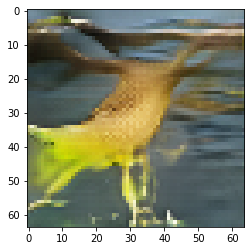

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 15

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.128774881362915 sec
Gen loss: 10.79336875047141, Gen valid loss: 1.4885097215492227, Gen attr loss: 4.680544977911766, Gen caption loss: 4.624314030334555, Disc valid loss: 1.0035597139257726, Disc valid real loss: 0.5209172592576603, Disc valid fake loss: 0.48264245418352164, Disc attr loss: 8.39247979316608, Disc attr real loss: 3.711934815254315, Disc attr fake loss: 4.680544977911766
Time for epoch 2 is 38.35081171989441 sec
Gen loss: 10.854499055764217, Gen valid loss: 1.4959284787578635, Gen attr loss: 4.707232398392385, Gen caption loss: 4.6513381992898335, Disc valid loss: 0.9877613684349267, Disc valid real loss: 0.5130123241645533, Disc valid fake loss: 0.4747490442703733, Disc attr loss: 8.419418794352834, Disc attr real loss: 3.7121863959604484, Disc attr fake loss: 4.707232398392385
Time for epoch 3 is 38.18066167831421 sec
Gen loss: 1

Time for epoch 21 is 38.17291307449341 sec
Gen loss: 10.86468667648026, Gen valid loss: 1.5037467944912795, Gen attr loss: 4.711368584051365, Gen caption loss: 4.649571284369078, Disc valid loss: 0.9926415544538317, Disc valid real loss: 0.5160641898792288, Disc valid fake loss: 0.47657736513995863, Disc attr loss: 8.42072252981708, Disc attr real loss: 3.709353945765715, Disc attr fake loss: 4.711368584051365
Time for epoch 22 is 38.16317319869995 sec
Gen loss: 10.824139065212673, Gen valid loss: 1.4842741673554831, Gen attr loss: 4.699800373092899, Gen caption loss: 4.64006449988864, Disc valid loss: 0.9960677977499923, Disc valid real loss: 0.5189760788507901, Disc valid fake loss: 0.4770917194645579, Disc attr loss: 8.40653817440436, Disc attr real loss: 3.706737801311462, Disc attr fake loss: 4.699800373092899
Time for epoch 23 is 38.22794008255005 sec
Gen loss: 10.807729936873686, Gen valid loss: 1.4813613633153238, Gen attr loss: 4.6875453079296, Gen caption loss: 4.638823253998

Time for epoch 41 is 38.13366985321045 sec
Gen loss: 10.794014819592318, Gen valid loss: 1.4878426925922796, Gen attr loss: 4.680363923876589, Gen caption loss: 4.6258082234762545, Disc valid loss: 0.9971455237083642, Disc valid real loss: 0.5145875558782076, Disc valid fake loss: 0.482557968153217, Disc attr loss: 8.37843709134151, Disc attr real loss: 3.6980731674649205, Disc attr fake loss: 4.680363923876589
Time for epoch 42 is 38.40492653846741 sec
Gen loss: 10.81695197139006, Gen valid loss: 1.4856143569558617, Gen attr loss: 4.696749091471437, Gen caption loss: 4.634588539438842, Disc valid loss: 0.9971857634663259, Disc valid real loss: 0.5165236252271709, Disc valid fake loss: 0.4806621395313966, Disc attr loss: 8.395842632304038, Disc attr real loss: 3.6990935408326022, Disc attr fake loss: 4.696749091471437
Time for epoch 43 is 38.253133058547974 sec
Gen loss: 10.83275550232347, Gen valid loss: 1.4841113100206949, Gen attr loss: 4.699879871151311, Gen caption loss: 4.6487643

Time for epoch 61 is 38.306499004364014 sec
Gen loss: 10.783639871654149, Gen valid loss: 1.4936493664253048, Gen attr loss: 4.663860621491099, Gen caption loss: 4.626129876630416, Disc valid loss: 1.0036802934760323, Disc valid real loss: 0.5165633094020006, Disc valid fake loss: 0.4871169847201526, Disc attr loss: 8.353613165982047, Disc attr real loss: 3.6897525444909487, Disc attr fake loss: 4.663860621491099
Time for epoch 62 is 38.275246381759644 sec
Gen loss: 10.833526389062566, Gen valid loss: 1.4974174712731587, Gen attr loss: 4.695040928315987, Gen caption loss: 4.6410680030419575, Disc valid loss: 0.9851529488395546, Disc valid real loss: 0.5078829359717485, Disc valid fake loss: 0.4772700137562222, Disc attr loss: 8.385594936567271, Disc attr real loss: 3.6905540082512833, Disc attr fake loss: 4.695040928315987
Time for epoch 63 is 38.275845527648926 sec
Gen loss: 10.83876297338222, Gen valid loss: 1.4879147508926185, Gen attr loss: 4.701695369188055, Gen caption loss: 4.64

Time for epoch 81 is 38.548970460891724 sec
Gen loss: 10.782401441558589, Gen valid loss: 1.4846705198287964, Gen attr loss: 4.669135242296751, Gen caption loss: 4.628595662310841, Disc valid loss: 1.0028772454274701, Disc valid real loss: 0.5196789046774711, Disc valid fake loss: 0.4831983397000527, Disc attr loss: 8.357543476228791, Disc attr real loss: 3.6884082339320403, Disc attr fake loss: 4.669135242296751
Time for epoch 82 is 38.20802927017212 sec
Gen loss: 10.848509726485586, Gen valid loss: 1.5079536005087337, Gen attr loss: 4.703501154090654, Gen caption loss: 4.63705502874483, Disc valid loss: 0.9871121170074959, Disc valid real loss: 0.5149118398747793, Disc valid fake loss: 0.47220027890954885, Disc attr loss: 8.391601525671113, Disc attr real loss: 3.6881003715804597, Disc attr fake loss: 4.703501154090654
Time for epoch 83 is 38.65285587310791 sec
Gen loss: 10.834052167287687, Gen valid loss: 1.4773634365257533, Gen attr loss: 4.706013508282379, Gen caption loss: 4.6506

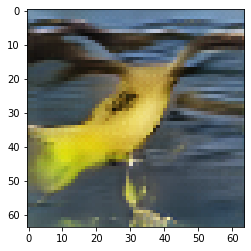

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 16

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.39256548881531 sec
Gen loss: 10.786570016607683, Gen valid loss: 1.4928939219735826, Gen attr loss: 4.674376441857356, Gen caption loss: 4.61929965794571, Disc valid loss: 0.9910350548542612, Disc valid real loss: 0.5066048367236687, Disc valid fake loss: 0.4844302164345253, Disc attr loss: 8.35534935075093, Disc attr real loss: 3.6809729088935748, Disc attr fake loss: 4.674376441857356
Time for epoch 2 is 38.543784379959106 sec
Gen loss: 10.831019967552123, Gen valid loss: 1.5076968298371891, Gen attr loss: 4.693207624481945, Gen caption loss: 4.63011551484829, Disc valid loss: 0.9889964752080964, Disc valid real loss: 0.508390945470753, Disc valid fake loss: 0.4806055279605111, Disc attr loss: 8.37352700995882, Disc attr real loss: 3.6803193854768748, Disc attr fake loss: 4.693207624481945
Time for epoch 3 is 38.32264828681946 sec
Gen loss: 10.82

Time for epoch 21 is 38.2715847492218 sec
Gen loss: 10.805039129283047, Gen valid loss: 1.4710827248529368, Gen attr loss: 4.689189683454146, Gen caption loss: 4.644766744882434, Disc valid loss: 1.0042757537306808, Disc valid real loss: 0.5202303142728522, Disc valid fake loss: 0.4840454377617616, Disc attr loss: 8.363812732825757, Disc attr real loss: 3.6746230493716108, Disc attr fake loss: 4.689189683454146
Time for epoch 22 is 38.36847996711731 sec
Gen loss: 10.81737631510913, Gen valid loss: 1.4916735079876453, Gen attr loss: 4.695391774500612, Gen caption loss: 4.630310998699529, Disc valid loss: 0.9948312848564086, Disc valid real loss: 0.5165468454360962, Disc valid fake loss: 0.47828443982413793, Disc attr loss: 8.372065828421574, Disc attr real loss: 3.676674053920963, Disc attr fake loss: 4.695391774500612
Time for epoch 23 is 38.41840171813965 sec
Gen loss: 10.781644575641085, Gen valid loss: 1.4925809139158668, Gen attr loss: 4.672031821274176, Gen caption loss: 4.6170318

Time for epoch 41 is 38.40135645866394 sec
Gen loss: 10.867510464779407, Gen valid loss: 1.485225794438101, Gen attr loss: 4.722124453159529, Gen caption loss: 4.660160226227468, Disc valid loss: 1.0031376120843862, Disc valid real loss: 0.5178042054983981, Disc valid fake loss: 0.48533340585910206, Disc attr loss: 8.392842038214045, Disc attr real loss: 3.6707175850545166, Disc attr fake loss: 4.722124453159529
Time for epoch 42 is 38.423500776290894 sec
Gen loss: 10.849014476062806, Gen valid loss: 1.4825909254027576, Gen attr loss: 4.711075868063826, Gen caption loss: 4.655347645121215, Disc valid loss: 0.9914490746934885, Disc valid real loss: 0.5088220753159304, Disc valid fake loss: 0.48262699929679315, Disc attr loss: 8.379638188576633, Disc attr real loss: 3.668562320512808, Disc attr fake loss: 4.711075868063826
Time for epoch 43 is 38.373515605926514 sec
Gen loss: 10.827924630183192, Gen valid loss: 1.4944657985433976, Gen attr loss: 4.6873390991190265, Gen caption loss: 4.64

Time for epoch 61 is 38.767667293548584 sec
Gen loss: 10.734997390085443, Gen valid loss: 1.481207833380557, Gen attr loss: 4.651994187011305, Gen caption loss: 4.601795363878493, Disc valid loss: 0.9970216268123326, Disc valid real loss: 0.512815920883401, Disc valid fake loss: 0.4842057046366901, Disc attr loss: 8.317335730968775, Disc attr real loss: 3.66534154395747, Disc attr fake loss: 4.651994187011305
Time for epoch 62 is 38.28442120552063 sec
Gen loss: 10.80251368597594, Gen valid loss: 1.4772252206233782, Gen attr loss: 4.692268927892049, Gen caption loss: 4.6330195397219365, Disc valid loss: 0.9986741240754683, Disc valid real loss: 0.5139423074114936, Disc valid fake loss: 0.4847318175523908, Disc attr loss: 8.36042168534545, Disc attr real loss: 3.6681527574534014, Disc attr fake loss: 4.692268927892049
Time for epoch 63 is 38.751834869384766 sec
Gen loss: 10.790938111178598, Gen valid loss: 1.4689132996044831, Gen attr loss: 4.683567341104109, Gen caption loss: 4.63845750

Time for epoch 81 is 38.749568462371826 sec
Gen loss: 10.798008337253478, Gen valid loss: 1.4700109528978342, Gen attr loss: 4.6927572588933515, Gen caption loss: 4.635240117385782, Disc valid loss: 1.0084606927584827, Disc valid real loss: 0.5237379491652253, Disc valid fake loss: 0.48472274520855935, Disc attr loss: 8.351094917230167, Disc attr real loss: 3.6583376583368152, Disc attr fake loss: 4.6927572588933515
Time for epoch 82 is 38.778154611587524 sec
Gen loss: 10.787386656453616, Gen valid loss: 1.4858788006350923, Gen attr loss: 4.671968927228354, Gen caption loss: 4.6295389224520225, Disc valid loss: 0.9894753881909337, Disc valid real loss: 0.5073285381483837, Disc valid fake loss: 0.4821468495579593, Disc attr loss: 8.331010362966273, Disc attr real loss: 3.65904143573792, Disc attr fake loss: 4.671968927228354
Time for epoch 83 is 38.4910683631897 sec
Gen loss: 10.772910138778894, Gen valid loss: 1.4850572967916968, Gen attr loss: 4.67043569546728, Gen caption loss: 4.617

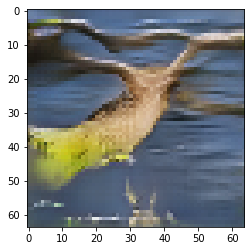

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 17

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.70860528945923 sec
Gen loss: 10.8189824964942, Gen valid loss: 1.4844648447140123, Gen attr loss: 4.69008644938792, Gen caption loss: 4.644431194961879, Disc valid loss: 1.0072609688531415, Disc valid real loss: 0.5202887988672024, Disc valid fake loss: 0.48697217063206, Disc attr loss: 8.340841880658777, Disc attr real loss: 3.650755431270858, Disc attr fake loss: 4.69008644938792
Time for epoch 2 is 38.67936110496521 sec
Gen loss: 10.810956195117981, Gen valid loss: 1.463700642107625, Gen attr loss: 4.699253787839316, Gen caption loss: 4.648001729634396, Disc valid loss: 1.0053037752303973, Disc valid real loss: 0.5197453277543954, Disc valid fake loss: 0.4855584472337066, Disc attr loss: 8.34858406914605, Disc attr real loss: 3.6493302813067348, Disc attr fake loss: 4.699253787839316
Time for epoch 3 is 38.70149326324463 sec
Gen loss: 10.8317204

Time for epoch 21 is 38.77072024345398 sec
Gen loss: 10.807960499915973, Gen valid loss: 1.4712150090432103, Gen attr loss: 4.698444299904635, Gen caption loss: 4.638301182568558, Disc valid loss: 1.0059096703361365, Disc valid real loss: 0.5176893611587483, Disc valid fake loss: 0.4882203076428514, Disc attr loss: 8.343490587017401, Disc attr real loss: 3.645046287112766, Disc attr fake loss: 4.698444299904635
Time for epoch 22 is 38.762871503829956 sec
Gen loss: 10.804175904126671, Gen valid loss: 1.4861484274954653, Gen attr loss: 4.687494116423899, Gen caption loss: 4.630533372806663, Disc valid loss: 0.9938215862121685, Disc valid real loss: 0.5135843207034961, Disc valid fake loss: 0.48023726680091405, Disc attr loss: 8.333045336612194, Disc attr real loss: 3.645551220188296, Disc attr fake loss: 4.687494116423899
Time for epoch 23 is 38.77568697929382 sec
Gen loss: 10.840302668935884, Gen valid loss: 1.4777913897987303, Gen attr loss: 4.699764055934379, Gen caption loss: 4.66274

Time for epoch 41 is 38.61035776138306 sec
Gen loss: 10.818051931334704, Gen valid loss: 1.4778267681437134, Gen attr loss: 4.703569482658613, Gen caption loss: 4.636655721561049, Disc valid loss: 1.0010531226470865, Disc valid real loss: 0.5162104041111178, Disc valid fake loss: 0.4848427190205592, Disc attr loss: 8.34053058546733, Disc attr real loss: 3.636961102808717, Disc attr fake loss: 4.703569482658613
Time for epoch 42 is 38.64353942871094 sec
Gen loss: 10.849615621695996, Gen valid loss: 1.5000057527366368, Gen attr loss: 4.70122027590992, Gen caption loss: 4.648389574634996, Disc valid loss: 0.9883416634265, Disc valid real loss: 0.5103979789144625, Disc valid fake loss: 0.4779436849966282, Disc attr loss: 8.342930356984539, Disc attr real loss: 3.6417100810746192, Disc attr fake loss: 4.70122027590992
Time for epoch 43 is 38.575981855392456 sec
Gen loss: 10.883222667828486, Gen valid loss: 1.4967830452492568, Gen attr loss: 4.729102235499436, Gen caption loss: 4.65733738514

Time for epoch 61 is 38.445969581604004 sec
Gen loss: 10.740500282142866, Gen valid loss: 1.4649663908371757, Gen attr loss: 4.657185376175051, Gen caption loss: 4.618348493162532, Disc valid loss: 1.0069030352078157, Disc valid real loss: 0.520880108603294, Disc valid fake loss: 0.4860229253930451, Disc attr loss: 8.290350665244953, Disc attr real loss: 3.6331652890699018, Disc attr fake loss: 4.657185376175051
Time for epoch 62 is 38.47971224784851 sec
Gen loss: 10.819558952558978, Gen valid loss: 1.4689092978552427, Gen attr loss: 4.698924728848424, Gen caption loss: 4.651724920686345, Disc valid loss: 0.9990447254038761, Disc valid real loss: 0.5172183941696394, Disc valid fake loss: 0.4818263297804649, Disc attr loss: 8.331433422197172, Disc attr real loss: 3.632508693348748, Disc attr fake loss: 4.698924728848424
Time for epoch 63 is 38.51840901374817 sec
Gen loss: 10.809274427936007, Gen valid loss: 1.4783929363498842, Gen attr loss: 4.697178745657448, Gen caption loss: 4.633702

Time for epoch 81 is 38.4525101184845 sec
Gen loss: 10.817589399291247, Gen valid loss: 1.4574374076796741, Gen attr loss: 4.706791581823251, Gen caption loss: 4.65336039977345, Disc valid loss: 1.0164838517261392, Disc valid real loss: 0.5252135979935406, Disc valid fake loss: 0.4912702559132563, Disc attr loss: 8.328968932635092, Disc attr real loss: 3.622177350811842, Disc attr fake loss: 4.706791581823251
Time for epoch 82 is 38.47451829910278 sec
Gen loss: 10.795730407322003, Gen valid loss: 1.4814743213860324, Gen attr loss: 4.684154047229426, Gen caption loss: 4.630102064551377, Disc valid loss: 0.9926467326275379, Disc valid real loss: 0.5114471865540274, Disc valid fake loss: 0.4811995471234567, Disc attr loss: 8.305821648135094, Disc attr real loss: 3.621667600905669, Disc attr fake loss: 4.684154047229426
Time for epoch 83 is 38.426520109176636 sec
Gen loss: 10.80157253089636, Gen valid loss: 1.4671596337140091, Gen attr loss: 4.698111412001819, Gen caption loss: 4.636301475

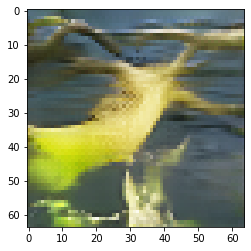

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 18

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.4897358417511 sec
Gen loss: 10.785785388171188, Gen valid loss: 1.4788618976184669, Gen attr loss: 4.6807837609030045, Gen caption loss: 4.626139735141744, Disc valid loss: 1.0065222431004532, Disc valid real loss: 0.5198059174103465, Disc valid fake loss: 0.48671632552857647, Disc attr loss: 8.297084825148751, Disc attr real loss: 3.616301064245746, Disc attr fake loss: 4.6807837609030045
Time for epoch 2 is 38.436872243881226 sec
Gen loss: 10.819720433656439, Gen valid loss: 1.4709915155317725, Gen attr loss: 4.699249171306124, Gen caption loss: 4.649479703851509, Disc valid loss: 0.9980441071799777, Disc valid real loss: 0.5158760430528543, Disc valid fake loss: 0.4821680649347745, Disc attr loss: 8.31849807387768, Disc attr real loss: 3.619248902571557, Disc attr fake loss: 4.699249171306124
Time for epoch 3 is 38.441206216812134 sec
Gen loss: 

Time for epoch 21 is 38.46443033218384 sec
Gen loss: 10.827065000043007, Gen valid loss: 1.4864146916200798, Gen attr loss: 4.703432588396357, Gen caption loss: 4.637217698058461, Disc valid loss: 1.0030579867401743, Disc valid real loss: 0.519706054350871, Disc valid fake loss: 0.48335193190471265, Disc attr loss: 8.314111442746832, Disc attr real loss: 3.6106788543504753, Disc attr fake loss: 4.703432588396357
Time for epoch 22 is 38.43692183494568 sec
Gen loss: 10.727723581681083, Gen valid loss: 1.457779399747771, Gen attr loss: 4.6520591383057885, Gen caption loss: 4.617885039104679, Disc valid loss: 0.999072983012936, Disc valid real loss: 0.5173410094042781, Disc valid fake loss: 0.4817319719125908, Disc attr loss: 8.26303807959001, Disc attr real loss: 3.610978941284221, Disc attr fake loss: 4.6520591383057885
Time for epoch 23 is 38.49548316001892 sec
Gen loss: 10.790380023036223, Gen valid loss: 1.4856768394227273, Gen attr loss: 4.685404829862641, Gen caption loss: 4.6192983

Time for epoch 41 is 38.501617670059204 sec
Gen loss: 10.781867355512087, Gen valid loss: 1.474053220051091, Gen attr loss: 4.68681220891999, Gen caption loss: 4.621001980169033, Disc valid loss: 1.002505512741523, Disc valid real loss: 0.5181648193336115, Disc valid fake loss: 0.48434069276179076, Disc attr loss: 8.291391651158733, Disc attr real loss: 3.604579442238743, Disc attr fake loss: 4.68681220891999
Time for epoch 42 is 38.4303023815155 sec
Gen loss: 10.774643605963648, Gen valid loss: 1.4855960352310966, Gen attr loss: 4.668260125932978, Gen caption loss: 4.620787482920701, Disc valid loss: 0.9964313259938868, Disc valid real loss: 0.5144454419289824, Disc valid fake loss: 0.4819858826918977, Disc attr loss: 8.272027280595568, Disc attr real loss: 3.60376715466259, Disc attr fake loss: 4.668260125932978
Time for epoch 43 is 38.555002212524414 sec
Gen loss: 10.772717222611755, Gen valid loss: 1.4609572751735285, Gen attr loss: 4.68069782812744, Gen caption loss: 4.63106213740

Time for epoch 61 is 38.44365692138672 sec
Gen loss: 10.757859413539814, Gen valid loss: 1.4714922846817389, Gen attr loss: 4.669513428437354, Gen caption loss: 4.616853693959513, Disc valid loss: 1.0044147734073443, Disc valid real loss: 0.5196370652859127, Disc valid fake loss: 0.484777710059794, Disc attr loss: 8.271789836366649, Disc attr real loss: 3.6022764079292937, Disc attr fake loss: 4.669513428437354
Time for epoch 62 is 38.42479586601257 sec
Gen loss: 10.77133185430594, Gen valid loss: 1.479037435397223, Gen attr loss: 4.67675770912067, Gen caption loss: 4.6155367324022745, Disc valid loss: 0.99961744818261, Disc valid real loss: 0.5137699304557428, Disc valid fake loss: 0.48584751538467924, Disc attr loss: 8.275757934342877, Disc attr real loss: 3.5990002252222077, Disc attr fake loss: 4.67675770912067
Time for epoch 63 is 38.43625497817993 sec
Gen loss: 10.77644924225846, Gen valid loss: 1.473797325196305, Gen attr loss: 4.680660822850256, Gen caption loss: 4.621991119410

Time for epoch 81 is 38.41511130332947 sec
Gen loss: 10.785791727908581, Gen valid loss: 1.461943531100989, Gen attr loss: 4.685184746253781, Gen caption loss: 4.638663460568684, Disc valid loss: 1.0108275377976539, Disc valid real loss: 0.522318950432749, Disc valid fake loss: 0.4885085861534284, Disc attr loss: 8.281639898372536, Disc attr real loss: 3.596455152118755, Disc attr fake loss: 4.685184746253781
Time for epoch 82 is 38.462270736694336 sec
Gen loss: 10.817282831765771, Gen valid loss: 1.4881897137417057, Gen attr loss: 4.698304839896639, Gen caption loss: 4.630788284911696, Disc valid loss: 0.9890938973039146, Disc valid real loss: 0.510896106561025, Disc valid fake loss: 0.4781977889660574, Disc attr loss: 8.295724004910891, Disc attr real loss: 3.5974191650142515, Disc attr fake loss: 4.698304839896639
Time for epoch 83 is 38.414361238479614 sec
Gen loss: 10.809000824202045, Gen valid loss: 1.479351523768934, Gen attr loss: 4.696719190938686, Gen caption loss: 4.63293013

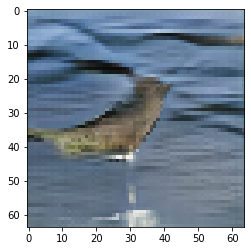

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 19

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.46150279045105 sec
Gen loss: 10.773285814094027, Gen valid loss: 1.4759340845149385, Gen attr loss: 4.677967115469419, Gen caption loss: 4.619384573727119, Disc valid loss: 1.0021440254317389, Disc valid real loss: 0.5146557753325155, Disc valid fake loss: 0.487488249695398, Disc attr loss: 8.268962203648679, Disc attr real loss: 3.5909950881792603, Disc attr fake loss: 4.677967115469419
Time for epoch 2 is 38.40334486961365 sec
Gen loss: 10.779086831462415, Gen valid loss: 1.4742704675126528, Gen attr loss: 4.676174734343035, Gen caption loss: 4.628641666112554, Disc valid loss: 1.005081821909442, Disc valid real loss: 0.5155372704432263, Disc valid fake loss: 0.4895445521123364, Disc attr loss: 8.264012444633133, Disc attr real loss: 3.5878377102900973, Disc attr fake loss: 4.676174734343035
Time for epoch 3 is 38.41166830062866 sec
Gen loss: 10.

Time for epoch 21 is 38.43734550476074 sec
Gen loss: 10.78734466893886, Gen valid loss: 1.4759450766452282, Gen attr loss: 4.682225100070157, Gen caption loss: 4.629174452163986, Disc valid loss: 1.0028486673424883, Disc valid real loss: 0.5166731046305763, Disc valid fake loss: 0.4861755615004356, Disc attr loss: 8.266575638194718, Disc attr real loss: 3.58435053812456, Disc attr fake loss: 4.682225100070157
Time for epoch 22 is 38.41420102119446 sec
Gen loss: 10.722223005320645, Gen valid loss: 1.4674003948041094, Gen attr loss: 4.644080746787673, Gen caption loss: 4.610741826576915, Disc valid loss: 1.0028349448671832, Disc valid real loss: 0.5213858580524683, Disc valid fake loss: 0.48144908802619146, Disc attr loss: 8.22773568740059, Disc attr real loss: 3.583654940612917, Disc attr fake loss: 4.644080746787673
Time for epoch 23 is 38.4516863822937 sec
Gen loss: 10.734112726640571, Gen valid loss: 1.4669786950113974, Gen attr loss: 4.6602470325583685, Gen caption loss: 4.606887015

Time for epoch 41 is 38.462435483932495 sec
Gen loss: 10.766062932931957, Gen valid loss: 1.459216079737759, Gen attr loss: 4.678444963160569, Gen caption loss: 4.6284019191090655, Disc valid loss: 1.0152047699706017, Disc valid real loss: 0.5248696765279383, Disc valid fake loss: 0.490335092958073, Disc attr loss: 8.258536824042881, Disc attr real loss: 3.580091860882312, Disc attr fake loss: 4.678444963160569
Time for epoch 42 is 38.39315104484558 sec
Gen loss: 10.755195995010334, Gen valid loss: 1.4765521165155138, Gen attr loss: 4.661536273594471, Gen caption loss: 4.61710758907039, Disc valid loss: 0.9973711242197651, Disc valid real loss: 0.5138994792127997, Disc valid fake loss: 0.4834716441993145, Disc attr loss: 8.244130659878738, Disc attr real loss: 3.5825943862842675, Disc attr fake loss: 4.661536273594471
Time for epoch 43 is 38.40105962753296 sec
Gen loss: 10.74763229545862, Gen valid loss: 1.4495740405266202, Gen attr loss: 4.670982098514795, Gen caption loss: 4.62707613

Time for epoch 61 is 38.41356587409973 sec
Gen loss: 10.774584064638711, Gen valid loss: 1.4527277823709215, Gen attr loss: 4.690135170773762, Gen caption loss: 4.631721180628955, Disc valid loss: 1.014776587486267, Disc valid real loss: 0.5207759722623075, Disc valid fake loss: 0.49400061635467096, Disc attr loss: 8.267479525672066, Disc attr real loss: 3.577344354898303, Disc attr fake loss: 4.690135170773762
Time for epoch 62 is 38.393595933914185 sec
Gen loss: 10.758549072555088, Gen valid loss: 1.4523138896559635, Gen attr loss: 4.67891299886109, Gen caption loss: 4.627322186622516, Disc valid loss: 1.0066075872599594, Disc valid real loss: 0.518076435579517, Disc valid fake loss: 0.4885311503882008, Disc attr loss: 8.253701506591424, Disc attr real loss: 3.574788507730334, Disc attr fake loss: 4.67891299886109
Time for epoch 63 is 38.47921442985535 sec
Gen loss: 10.77489171118594, Gen valid loss: 1.466677260592701, Gen attr loss: 4.683133644140186, Gen caption loss: 4.62508078513

Time for epoch 81 is 38.31610298156738 sec
Gen loss: 10.798557729901983, Gen valid loss: 1.4843430325267761, Gen attr loss: 4.684628786433357, Gen caption loss: 4.629585945832374, Disc valid loss: 1.004207716724737, Disc valid real loss: 0.5169911264242518, Disc valid fake loss: 0.4872165894120689, Disc attr loss: 8.259232893222716, Disc attr real loss: 3.574604106789359, Disc attr fake loss: 4.684628786433357
Time for epoch 82 is 38.29700183868408 sec
Gen loss: 10.795014104868985, Gen valid loss: 1.4859336152632385, Gen attr loss: 4.679853051658569, Gen caption loss: 4.6292274683148555, Disc valid loss: 0.9948680662527317, Disc valid real loss: 0.5131064310952577, Disc valid fake loss: 0.48176163612665523, Disc attr loss: 8.252300564189591, Disc attr real loss: 3.572447512531022, Disc attr fake loss: 4.679853051658569
Time for epoch 83 is 38.39026212692261 sec
Gen loss: 10.73935953259145, Gen valid loss: 1.4633230310145433, Gen attr loss: 4.653469065663614, Gen caption loss: 4.6225674

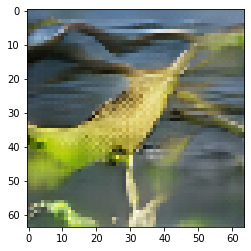

In [261]:
next_starting_checkpoint, totalepochs, warmup = long_train(starting_checkpoint=next_starting_checkpoint, 
                                      num_checkpoints=20, 
                                      checkpoint_interval=100, 
                                      g_hist=gen_loss_hist, 
                                      g_valid_hist=gen_valid_loss_hist,
                                      g_attr_hist=gen_attr_loss_hist,
                                      g_caption_hist=gen_caption_loss_hist,
                                      d_hist=disc_loss_hist,
                                      d_real_hist=disc_loss_real_hist,
                                      d_fake_hist=disc_loss_fake_hist,
                                      d_attr_real_hist=disc_attr_loss_real_hist,
                                      d_attr_fake_hist=disc_attr_loss_fake_hist,
                                      noise=noise300,
                                      caption=caption,
                                      save_files=True,
                                      warmup=warmup)

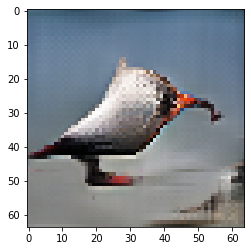

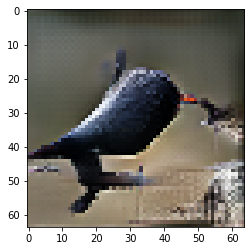

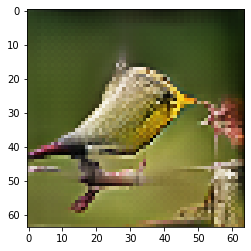

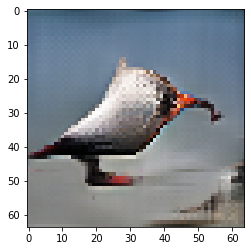

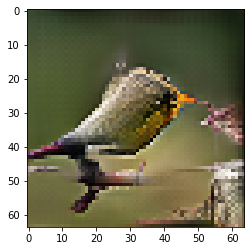

In [289]:
captions = train_captions[np.random.choice(range(len(train_captions)), 5, replace=False)]
# attrs = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
tempnoise = np.random.normal(0, 1, 300)
for i in range(5):
#     tempnoise = np.random.normal(0, 1, 300)

    
#     attrs[2] += 1.
    
    generated_image = generator.predict([np.array([tempnoise]), np.array([1.*captions[i]])] )[0][0]
    plt.imshow(unnormalize_img(generated_image))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

In [ ]:
caption = bc.encode(['the medium sized bird has a dark grey color, a black downward curved beak, and long wings.'])[0]
noise = np.random.normal(0, 1, 300)
for i in range(1):
    generated_image = generator.predict([np.array([noise]), np.array([1.*caption])] )[0][0]
    plt.imshow(unnormalize_img(generated_image))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

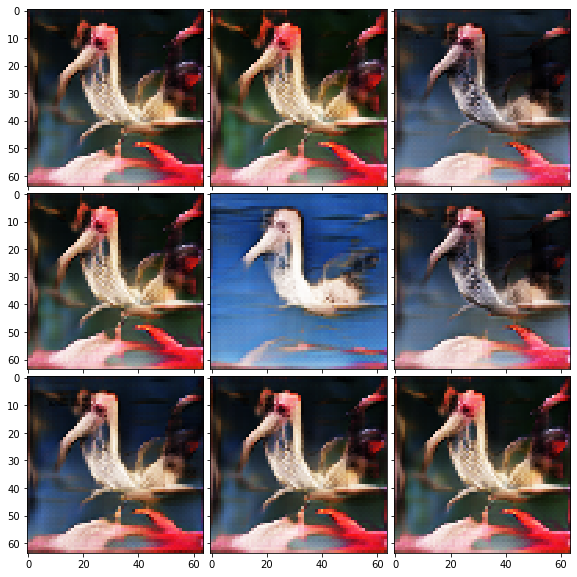

In [341]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

captions = train_captions[np.random.choice(range(len(train_captions)), 9, replace=False)]
tempnoise = np.random.normal(0, 1, 300)
for i, ax in enumerate(grid):
    generated_image = generator.predict([np.array([tempnoise]), np.array([captions[i]])] )[0][0]
    ax.imshow(unnormalize_img(generated_image))

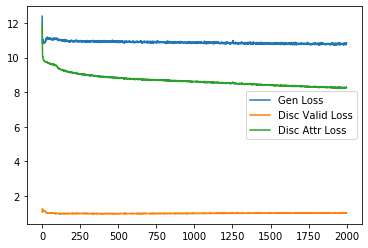

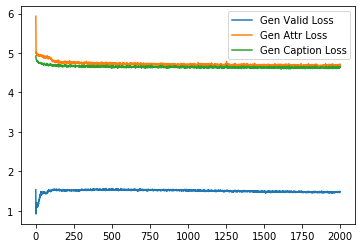

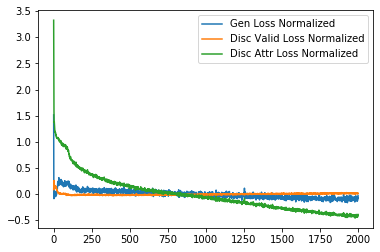

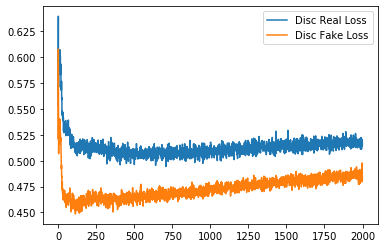

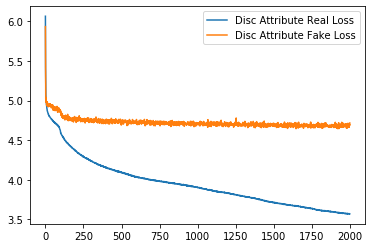

In [262]:
plot_save_dir = 'bird-gan-attributes-split-captions-concat-caption-loss-autoencoder'

from operator import add
disc_attr_loss_hist = list( map(add, disc_attr_loss_real_hist, disc_attr_loss_fake_hist) )

plt.plot(gen_loss_hist)
plt.plot(disc_loss_hist)
plt.plot(disc_attr_loss_hist)

plt.legend(['Gen Loss','Disc Valid Loss', 'Disc Attr Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses.png')
plt.show()

plt.plot(gen_valid_loss_hist)
plt.plot(gen_attr_loss_hist)
plt.plot(gen_caption_loss_hist)
plt.legend(['Gen Valid Loss', 'Gen Attr Loss', 'Gen Caption Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_valid_attr_losses.png')
plt.show()

plt.plot(gen_loss_hist - np.mean(gen_loss_hist))
plt.plot(disc_loss_hist - np.mean(disc_loss_hist))
plt.plot(disc_attr_loss_hist - np.mean(disc_attr_loss_hist))
plt.legend(['Gen Loss Normalized','Disc Valid Loss Normalized', 'Disc Attr Loss Normalized'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses_normalized.png')
plt.show()

plt.plot(disc_loss_real_hist)
plt.plot(disc_loss_fake_hist)
plt.legend(['Disc Real Loss','Disc Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_real_fake_losses.png')
plt.show()

plt.plot(disc_attr_loss_real_hist)
# plt.show()
plt.plot(disc_attr_loss_fake_hist)
plt.legend(['Disc Attribute Real Loss', 'Disc Attribute Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_attribute_real_fake_losses.png')
plt.show()


In [ ]:
prediction = discriminator_attr.predict(np.array([train_imgs[6]]))[0]
print(np.where(np.round(prediction) == 1))

In [ ]:
prediction = discriminator_attr.predict(np.array([train_imgs[344]]))[0]
print(np.where(np.round(prediction) == 1))

In [ ]:
d = dict.fromkeys([i for i in range(10)], 0)
prediction = discriminator_attr.predict(np.array(train_imgs))
prediction = np.round(prediction)
for p in prediction:
    p = np.where(p == 1)
    for i in p[0]:
        d[i] += 1
    
# for im in train_imgs:
#     for p in prediction[0]:
#         d[p] += 1

In [ ]:
plt.bar([x for x in range(10)], d.values())

In [ ]:
plt.bar([x for x in range(10)], np.sum(train_attrs, axis=0))

In [ ]:
train_captions[0]

In [ ]:
from bert_serving.client import BertClient
bc = BertClient()

In [ ]:
testcaption = bc.encode(['red bird.'])[0]

In [ ]:
testcaption[0][0]
